In [1]:
import time
from collections import Counter
import warnings; warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from tslearn.shapelets import ShapeletModel

import os
import sys
sys.path.append('../pyshapelets')
from extractors.extractor import MultiGeneticExtractor
from algorithms import ShapeletTransformer
import util


from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [2]:
def grabocka_params_to_shapelet_size_dict(n_ts, ts_sz, n_shapelets, l, r):
    base_size = int(l * ts_sz)
    d = {}
    for sz_idx in range(r):
        shp_sz = base_size * (sz_idx + 1)
        d[shp_sz] = n_shapelets
    return d

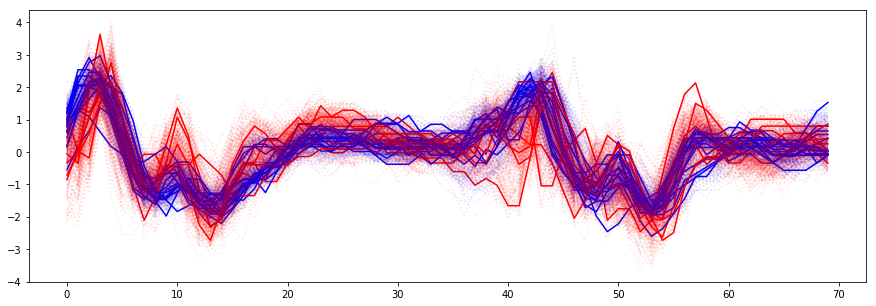

In [3]:
DATASET_NAME = 'SonyAIBORobotSurface1'
train_path = '../pyshapelets/data/partitioned/{}/{}_train.csv'.format(DATASET_NAME, DATASET_NAME)
test_path = '../pyshapelets/data/partitioned/{}/{}_test.csv'.format(DATASET_NAME, DATASET_NAME)
nr_shap, l, r, reg, max_it = [0.3,  0.125, 2, 0.01, 10000]

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

cmap = {
    1: 'r',
    2: 'b',
    3: 'g',
    4: 'y',
    5: 'c'
}

plt.figure(figsize=(15,5))
for shap, label in zip(train_data.drop('target', axis=1).values, train_data['target'].values):
    plt.plot(shap, c=cmap[label])
    
for shap, label in zip(test_data.drop('target', axis=1).values, test_data['target'].values):
    plt.plot(shap, c=cmap[label], linestyle=':', alpha=0.1)
plt.show()

X_train = train_data.drop('target', axis=1).values
y_train = train_data['target'].values

X_test = test_data.drop('target', axis=1).values
y_test = test_data['target'].values

In [4]:
shapelet_dict = grabocka_params_to_shapelet_size_dict(
        X_train.shape[0], X_train.shape[1], int(nr_shap*X_train.shape[1]), l, r
)
clf = ShapeletModel(n_shapelets_per_size=shapelet_dict, 
                    max_iter=max_it, verbose_level=1, batch_size=16,
                    optimizer='sgd', weight_regularizer=reg)
clf.fit(
    np.reshape(
        X_train, 
        (X_train.shape[0], X_train.shape[1], 1)
    ), 
    y_train
)

Epoch 1/10000
20/20 [==============================] - 1s 26ms/step - loss: 0.7302 - binary_accuracy: 0.3500 - binary_crossentropy: 0.7059
Epoch 2/10000
20/20 [==============================] - 0s 658us/step - loss: 0.7287 - binary_accuracy: 0.4000 - binary_crossentropy: 0.7044
Epoch 3/10000
20/20 [==============================] - 0s 785us/step - loss: 0.7272 - binary_accuracy: 0.4000 - binary_crossentropy: 0.7030
Epoch 4/10000
20/20 [==============================] - 0s 695us/step - loss: 0.7260 - binary_accuracy: 0.4000 - binary_crossentropy: 0.7017
Epoch 5/10000
20/20 [==============================] - 0s 794us/step - loss: 0.7239 - binary_accuracy: 0.4000 - binary_crossentropy: 0.6997
Epoch 6/10000
20/20 [==============================] - 0s 720us/step - loss: 0.7221 - binary_accuracy: 0.4500 - binary_crossentropy: 0.6979
Epoch 7/10000
20/20 [==============================] - 0s 600us/step - loss: 0.7208 - binary_accuracy: 0.4500 - binary_crossentropy: 0.6967
Epoch 8/10000
20/20 [

20/20 [==============================] - 0s 631us/step - loss: 0.6593 - binary_accuracy: 0.8000 - binary_crossentropy: 0.6361
Epoch 60/10000
20/20 [==============================] - 0s 674us/step - loss: 0.6583 - binary_accuracy: 0.8000 - binary_crossentropy: 0.6351
Epoch 61/10000
20/20 [==============================] - 0s 611us/step - loss: 0.6573 - binary_accuracy: 0.7500 - binary_crossentropy: 0.6341
Epoch 62/10000
20/20 [==============================] - 0s 730us/step - loss: 0.6563 - binary_accuracy: 0.7500 - binary_crossentropy: 0.6332
Epoch 63/10000
20/20 [==============================] - 0s 645us/step - loss: 0.6554 - binary_accuracy: 0.7500 - binary_crossentropy: 0.6322
Epoch 64/10000
20/20 [==============================] - 0s 682us/step - loss: 0.6542 - binary_accuracy: 0.7500 - binary_crossentropy: 0.6311
Epoch 65/10000
20/20 [==============================] - 0s 715us/step - loss: 0.6533 - binary_accuracy: 0.7500 - binary_crossentropy: 0.6302
Epoch 66/10000
20/20 [======

20/20 [==============================] - 0s 700us/step - loss: 0.6104 - binary_accuracy: 0.7500 - binary_crossentropy: 0.5876
Epoch 118/10000
20/20 [==============================] - 0s 753us/step - loss: 0.6097 - binary_accuracy: 0.7500 - binary_crossentropy: 0.5869
Epoch 119/10000
20/20 [==============================] - 0s 674us/step - loss: 0.6088 - binary_accuracy: 0.7500 - binary_crossentropy: 0.5860
Epoch 120/10000
20/20 [==============================] - 0s 554us/step - loss: 0.6085 - binary_accuracy: 0.7500 - binary_crossentropy: 0.5857
Epoch 121/10000
20/20 [==============================] - 0s 709us/step - loss: 0.6074 - binary_accuracy: 0.7500 - binary_crossentropy: 0.5846
Epoch 122/10000
20/20 [==============================] - 0s 733us/step - loss: 0.6065 - binary_accuracy: 0.7500 - binary_crossentropy: 0.5837
Epoch 123/10000
20/20 [==============================] - 0s 724us/step - loss: 0.6058 - binary_accuracy: 0.7500 - binary_crossentropy: 0.5830
Epoch 124/10000
20/20 

20/20 [==============================] - 0s 792us/step - loss: 0.5715 - binary_accuracy: 0.8000 - binary_crossentropy: 0.5486
Epoch 175/10000
20/20 [==============================] - 0s 729us/step - loss: 0.5708 - binary_accuracy: 0.8000 - binary_crossentropy: 0.5480
Epoch 176/10000
20/20 [==============================] - 0s 733us/step - loss: 0.5706 - binary_accuracy: 0.8000 - binary_crossentropy: 0.5477
Epoch 177/10000
20/20 [==============================] - 0s 622us/step - loss: 0.5697 - binary_accuracy: 0.8000 - binary_crossentropy: 0.5467
Epoch 178/10000
20/20 [==============================] - 0s 736us/step - loss: 0.5691 - binary_accuracy: 0.8000 - binary_crossentropy: 0.5461
Epoch 179/10000
20/20 [==============================] - 0s 694us/step - loss: 0.5685 - binary_accuracy: 0.8000 - binary_crossentropy: 0.5455
Epoch 180/10000
20/20 [==============================] - 0s 616us/step - loss: 0.5679 - binary_accuracy: 0.8000 - binary_crossentropy: 0.5450
Epoch 181/10000
20/20 

20/20 [==============================] - 0s 625us/step - loss: 0.5391 - binary_accuracy: 0.8500 - binary_crossentropy: 0.5156
Epoch 232/10000
20/20 [==============================] - 0s 790us/step - loss: 0.5386 - binary_accuracy: 0.8500 - binary_crossentropy: 0.5151
Epoch 233/10000
20/20 [==============================] - 0s 694us/step - loss: 0.5382 - binary_accuracy: 0.8500 - binary_crossentropy: 0.5147
Epoch 234/10000
20/20 [==============================] - 0s 558us/step - loss: 0.5375 - binary_accuracy: 0.8500 - binary_crossentropy: 0.5140
Epoch 235/10000
20/20 [==============================] - 0s 633us/step - loss: 0.5370 - binary_accuracy: 0.8500 - binary_crossentropy: 0.5134
Epoch 236/10000
20/20 [==============================] - 0s 597us/step - loss: 0.5364 - binary_accuracy: 0.8500 - binary_crossentropy: 0.5129
Epoch 237/10000
20/20 [==============================] - 0s 635us/step - loss: 0.5359 - binary_accuracy: 0.8500 - binary_crossentropy: 0.5123
Epoch 238/10000
20/20 

20/20 [==============================] - 0s 678us/step - loss: 0.5119 - binary_accuracy: 0.8500 - binary_crossentropy: 0.4876
Epoch 289/10000
20/20 [==============================] - 0s 567us/step - loss: 0.5115 - binary_accuracy: 0.8500 - binary_crossentropy: 0.4872
Epoch 290/10000
20/20 [==============================] - 0s 715us/step - loss: 0.5111 - binary_accuracy: 0.8500 - binary_crossentropy: 0.4867
Epoch 291/10000
20/20 [==============================] - 0s 629us/step - loss: 0.5106 - binary_accuracy: 0.8500 - binary_crossentropy: 0.4863
Epoch 292/10000
20/20 [==============================] - 0s 644us/step - loss: 0.5103 - binary_accuracy: 0.8500 - binary_crossentropy: 0.4859
Epoch 293/10000
20/20 [==============================] - 0s 624us/step - loss: 0.5100 - binary_accuracy: 0.8500 - binary_crossentropy: 0.4857
Epoch 294/10000
20/20 [==============================] - 0s 611us/step - loss: 0.5093 - binary_accuracy: 0.8500 - binary_crossentropy: 0.4849
Epoch 295/10000
20/20 

20/20 [==============================] - 0s 626us/step - loss: 0.4876 - binary_accuracy: 0.8500 - binary_crossentropy: 0.4621
Epoch 346/10000
20/20 [==============================] - 0s 661us/step - loss: 0.4872 - binary_accuracy: 0.8500 - binary_crossentropy: 0.4617
Epoch 347/10000
20/20 [==============================] - 0s 803us/step - loss: 0.4868 - binary_accuracy: 0.8500 - binary_crossentropy: 0.4613
Epoch 348/10000
20/20 [==============================] - 0s 869us/step - loss: 0.4863 - binary_accuracy: 0.8500 - binary_crossentropy: 0.4607
Epoch 349/10000
20/20 [==============================] - 0s 744us/step - loss: 0.4860 - binary_accuracy: 0.8500 - binary_crossentropy: 0.4604
Epoch 350/10000
20/20 [==============================] - 0s 684us/step - loss: 0.4857 - binary_accuracy: 0.8500 - binary_crossentropy: 0.4601
Epoch 351/10000
20/20 [==============================] - 0s 623us/step - loss: 0.4852 - binary_accuracy: 0.8500 - binary_crossentropy: 0.4597
Epoch 352/10000
20/20 

20/20 [==============================] - 0s 684us/step - loss: 0.4665 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4396
Epoch 403/10000
20/20 [==============================] - 0s 675us/step - loss: 0.4662 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4393
Epoch 404/10000
20/20 [==============================] - 0s 615us/step - loss: 0.4659 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4390
Epoch 405/10000
20/20 [==============================] - 0s 655us/step - loss: 0.4656 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4386
Epoch 406/10000
20/20 [==============================] - 0s 608us/step - loss: 0.4651 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4382
Epoch 407/10000
20/20 [==============================] - 0s 662us/step - loss: 0.4649 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4379
Epoch 408/10000
20/20 [==============================] - 0s 640us/step - loss: 0.4649 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4379
Epoch 409/10000
20/20 

20/20 [==============================] - 0s 639us/step - loss: 0.4483 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4200
Epoch 460/10000
20/20 [==============================] - 0s 735us/step - loss: 0.4479 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4196
Epoch 461/10000
20/20 [==============================] - 0s 686us/step - loss: 0.4476 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4194
Epoch 462/10000
20/20 [==============================] - 0s 647us/step - loss: 0.4474 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4190
Epoch 463/10000
20/20 [==============================] - 0s 749us/step - loss: 0.4470 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4187
Epoch 464/10000
20/20 [==============================] - 0s 687us/step - loss: 0.4467 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4183
Epoch 465/10000
20/20 [==============================] - 0s 712us/step - loss: 0.4464 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4180
Epoch 466/10000
20/20 

20/20 [==============================] - 0s 717us/step - loss: 0.4318 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4017
Epoch 517/10000
20/20 [==============================] - 0s 788us/step - loss: 0.4315 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4015
Epoch 518/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.4312 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4011
Epoch 519/10000
20/20 [==============================] - 0s 856us/step - loss: 0.4310 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4008
Epoch 520/10000
20/20 [==============================] - 0s 914us/step - loss: 0.4306 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4005
Epoch 521/10000
20/20 [==============================] - 0s 770us/step - loss: 0.4303 - binary_accuracy: 0.9000 - binary_crossentropy: 0.4001
Epoch 522/10000
20/20 [==============================] - 0s 933us/step - loss: 0.4301 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3999
Epoch 523/10000
20/20 [=

20/20 [==============================] - 0s 1ms/step - loss: 0.4170 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3855
Epoch 575/10000
20/20 [==============================] - 0s 846us/step - loss: 0.4168 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3853
Epoch 576/10000
20/20 [==============================] - 0s 637us/step - loss: 0.4166 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3850
Epoch 577/10000
20/20 [==============================] - 0s 656us/step - loss: 0.4163 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3847
Epoch 578/10000
20/20 [==============================] - 0s 658us/step - loss: 0.4161 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3845
Epoch 579/10000
20/20 [==============================] - 0s 775us/step - loss: 0.4158 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3841
Epoch 580/10000
20/20 [==============================] - 0s 742us/step - loss: 0.4156 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3838
Epoch 581/10000
20/20 [=

20/20 [==============================] - 0s 779us/step - loss: 0.4040 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3707
Epoch 632/10000
20/20 [==============================] - 0s 861us/step - loss: 0.4039 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3705
Epoch 633/10000
20/20 [==============================] - 0s 899us/step - loss: 0.4036 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3702
Epoch 634/10000
20/20 [==============================] - 0s 760us/step - loss: 0.4034 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3699
Epoch 635/10000
20/20 [==============================] - 0s 770us/step - loss: 0.4032 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3697
Epoch 636/10000
20/20 [==============================] - 0s 687us/step - loss: 0.4030 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3695
Epoch 637/10000
20/20 [==============================] - 0s 733us/step - loss: 0.4028 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3692
Epoch 638/10000
20/20 

20/20 [==============================] - 0s 615us/step - loss: 0.3924 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3575
Epoch 689/10000
20/20 [==============================] - 0s 657us/step - loss: 0.3922 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3573
Epoch 690/10000
20/20 [==============================] - 0s 673us/step - loss: 0.3920 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3570
Epoch 691/10000
20/20 [==============================] - 0s 693us/step - loss: 0.3918 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3568
Epoch 692/10000
20/20 [==============================] - 0s 655us/step - loss: 0.3916 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3566
Epoch 693/10000
20/20 [==============================] - 0s 579us/step - loss: 0.3914 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3564
Epoch 694/10000
20/20 [==============================] - 0s 648us/step - loss: 0.3913 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3562
Epoch 695/10000
20/20 

20/20 [==============================] - 0s 621us/step - loss: 0.3820 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3459
Epoch 746/10000
20/20 [==============================] - 0s 765us/step - loss: 0.3818 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3457
Epoch 747/10000
20/20 [==============================] - 0s 810us/step - loss: 0.3816 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3455
Epoch 748/10000
20/20 [==============================] - 0s 717us/step - loss: 0.3815 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3453
Epoch 749/10000
20/20 [==============================] - 0s 813us/step - loss: 0.3813 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3451
Epoch 750/10000
20/20 [==============================] - 0s 878us/step - loss: 0.3812 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3450
Epoch 751/10000
20/20 [==============================] - 0s 793us/step - loss: 0.3810 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3448
Epoch 752/10000
20/20 

20/20 [==============================] - 0s 829us/step - loss: 0.3725 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3347
Epoch 803/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.3723 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3346
Epoch 804/10000
20/20 [==============================] - 0s 962us/step - loss: 0.3722 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3345
Epoch 805/10000
20/20 [==============================] - 0s 630us/step - loss: 0.3720 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3342
Epoch 806/10000
20/20 [==============================] - 0s 610us/step - loss: 0.3719 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3341
Epoch 807/10000
20/20 [==============================] - 0s 637us/step - loss: 0.3717 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3339
Epoch 808/10000
20/20 [==============================] - 0s 742us/step - loss: 0.3715 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3337
Epoch 809/10000
20/20 [=

20/20 [==============================] - 0s 733us/step - loss: 0.3637 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3242
Epoch 860/10000
20/20 [==============================] - 0s 703us/step - loss: 0.3635 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3240
Epoch 861/10000
20/20 [==============================] - 0s 720us/step - loss: 0.3633 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3238
Epoch 862/10000
20/20 [==============================] - 0s 692us/step - loss: 0.3632 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3236
Epoch 863/10000
20/20 [==============================] - 0s 747us/step - loss: 0.3631 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3235
Epoch 864/10000
20/20 [==============================] - 0s 859us/step - loss: 0.3630 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3234
Epoch 865/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.3628 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3232
Epoch 866/10000
20/20 [=

20/20 [==============================] - 0s 691us/step - loss: 0.3558 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3148
Epoch 917/10000
20/20 [==============================] - 0s 762us/step - loss: 0.3556 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3147
Epoch 918/10000
20/20 [==============================] - 0s 732us/step - loss: 0.3555 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3145
Epoch 919/10000
20/20 [==============================] - 0s 645us/step - loss: 0.3553 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3142
Epoch 920/10000
20/20 [==============================] - 0s 726us/step - loss: 0.3552 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3141
Epoch 921/10000
20/20 [==============================] - 0s 667us/step - loss: 0.3551 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3140
Epoch 922/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.3550 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3139
Epoch 923/10000
20/20 [=

20/20 [==============================] - 0s 887us/step - loss: 0.3484 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3057
Epoch 974/10000
20/20 [==============================] - 0s 917us/step - loss: 0.3483 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3056
Epoch 975/10000
20/20 [==============================] - 0s 666us/step - loss: 0.3481 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3054
Epoch 976/10000
20/20 [==============================] - 0s 729us/step - loss: 0.3480 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3053
Epoch 977/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.3479 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3051
Epoch 978/10000
20/20 [==============================] - 0s 751us/step - loss: 0.3478 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3050
Epoch 979/10000
20/20 [==============================] - 0s 673us/step - loss: 0.3476 - binary_accuracy: 0.9000 - binary_crossentropy: 0.3049
Epoch 980/10000
20/20 [=

20/20 [==============================] - 0s 656us/step - loss: 0.3416 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2972
Epoch 1031/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.3415 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2971
Epoch 1032/10000
20/20 [==============================] - 0s 643us/step - loss: 0.3414 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2969
Epoch 1033/10000
20/20 [==============================] - 0s 870us/step - loss: 0.3413 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2968
Epoch 1034/10000
20/20 [==============================] - 0s 910us/step - loss: 0.3412 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2967
Epoch 1035/10000
20/20 [==============================] - 0s 969us/step - loss: 0.3410 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2965
Epoch 1036/10000
20/20 [==============================] - 0s 714us/step - loss: 0.3409 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2964
Epoch 1037/10000
2

20/20 [==============================] - 0s 683us/step - loss: 0.3352 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2895
Epoch 1088/10000
20/20 [==============================] - 0s 761us/step - loss: 0.3351 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2893
Epoch 1089/10000
20/20 [==============================] - 0s 937us/step - loss: 0.3350 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2892
Epoch 1090/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.3349 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2891
Epoch 1091/10000
20/20 [==============================] - 0s 966us/step - loss: 0.3348 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2890
Epoch 1092/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.3347 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2889
Epoch 1093/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.3346 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2887
Epoch 1094/10000
20/20

20/20 [==============================] - 0s 558us/step - loss: 0.3292 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2820
Epoch 1145/10000
20/20 [==============================] - 0s 699us/step - loss: 0.3292 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2820
Epoch 1146/10000
20/20 [==============================] - 0s 625us/step - loss: 0.3290 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2817
Epoch 1147/10000
20/20 [==============================] - 0s 607us/step - loss: 0.3289 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2816
Epoch 1148/10000
20/20 [==============================] - 0s 714us/step - loss: 0.3289 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2815
Epoch 1149/10000
20/20 [==============================] - 0s 905us/step - loss: 0.3287 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2813
Epoch 1150/10000
20/20 [==============================] - 0s 751us/step - loss: 0.3287 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2813
Epoch 1151/10000

20/20 [==============================] - 0s 933us/step - loss: 0.3238 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2751
Epoch 1202/10000
20/20 [==============================] - 0s 916us/step - loss: 0.3237 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2751
Epoch 1203/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.3236 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2749
Epoch 1204/10000
20/20 [==============================] - 0s 961us/step - loss: 0.3235 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2747
Epoch 1205/10000
20/20 [==============================] - 0s 901us/step - loss: 0.3234 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2747
Epoch 1206/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.3234 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2746
Epoch 1207/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.3234 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2747
Epoch 1208/10000
20/20

20/20 [==============================] - 0s 766us/step - loss: 0.3188 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2687
Epoch 1259/10000
20/20 [==============================] - 0s 859us/step - loss: 0.3187 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2685
Epoch 1260/10000
20/20 [==============================] - 0s 745us/step - loss: 0.3187 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2684
Epoch 1261/10000
20/20 [==============================] - 0s 849us/step - loss: 0.3186 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2683
Epoch 1262/10000
20/20 [==============================] - 0s 635us/step - loss: 0.3185 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2682
Epoch 1263/10000
20/20 [==============================] - 0s 921us/step - loss: 0.3184 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2681
Epoch 1264/10000
20/20 [==============================] - 0s 589us/step - loss: 0.3183 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2680
Epoch 1265/10000

20/20 [==============================] - 0s 604us/step - loss: 0.3141 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2625
Epoch 1316/10000
20/20 [==============================] - 0s 939us/step - loss: 0.3140 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2625
Epoch 1317/10000
20/20 [==============================] - 0s 999us/step - loss: 0.3139 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2623
Epoch 1318/10000
20/20 [==============================] - 0s 581us/step - loss: 0.3138 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2623
Epoch 1319/10000
20/20 [==============================] - 0s 669us/step - loss: 0.3137 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2622
Epoch 1320/10000
20/20 [==============================] - 0s 634us/step - loss: 0.3136 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2621
Epoch 1321/10000
20/20 [==============================] - 0s 927us/step - loss: 0.3135 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2620
Epoch 1322/10000

20/20 [==============================] - 0s 702us/step - loss: 0.3096 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2568
Epoch 1373/10000
20/20 [==============================] - 0s 715us/step - loss: 0.3096 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2568
Epoch 1374/10000
20/20 [==============================] - 0s 617us/step - loss: 0.3095 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2566
Epoch 1375/10000
20/20 [==============================] - 0s 732us/step - loss: 0.3095 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2566
Epoch 1376/10000
20/20 [==============================] - 0s 667us/step - loss: 0.3094 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2564
Epoch 1377/10000
20/20 [==============================] - 0s 616us/step - loss: 0.3093 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2564
Epoch 1378/10000
20/20 [==============================] - 0s 719us/step - loss: 0.3092 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2563
Epoch 1379/10000

20/20 [==============================] - 0s 605us/step - loss: 0.3055 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2516
Epoch 1430/10000
20/20 [==============================] - 0s 691us/step - loss: 0.3054 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2515
Epoch 1431/10000
20/20 [==============================] - 0s 683us/step - loss: 0.3053 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2515
Epoch 1432/10000
20/20 [==============================] - 0s 701us/step - loss: 0.3053 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2515
Epoch 1433/10000
20/20 [==============================] - 0s 679us/step - loss: 0.3052 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2513
Epoch 1434/10000
20/20 [==============================] - 0s 709us/step - loss: 0.3051 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2512
Epoch 1435/10000
20/20 [==============================] - 0s 707us/step - loss: 0.3051 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2511
Epoch 1436/10000

20/20 [==============================] - 0s 696us/step - loss: 0.3015 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2465
Epoch 1487/10000
20/20 [==============================] - 0s 760us/step - loss: 0.3015 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2465
Epoch 1488/10000
20/20 [==============================] - 0s 779us/step - loss: 0.3014 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2463
Epoch 1489/10000
20/20 [==============================] - 0s 601us/step - loss: 0.3013 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2462
Epoch 1490/10000
20/20 [==============================] - 0s 717us/step - loss: 0.3012 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2461
Epoch 1491/10000
20/20 [==============================] - 0s 735us/step - loss: 0.3012 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2460
Epoch 1492/10000
20/20 [==============================] - 0s 706us/step - loss: 0.3012 - binary_accuracy: 0.9000 - binary_crossentropy: 0.2460
Epoch 1493/10000

20/20 [==============================] - 0s 898us/step - loss: 0.2978 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2416
Epoch 1544/10000
20/20 [==============================] - 0s 734us/step - loss: 0.2977 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2416
Epoch 1545/10000
20/20 [==============================] - 0s 785us/step - loss: 0.2976 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2415
Epoch 1546/10000
20/20 [==============================] - 0s 691us/step - loss: 0.2975 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2414
Epoch 1547/10000
20/20 [==============================] - 0s 735us/step - loss: 0.2976 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2415
Epoch 1548/10000
20/20 [==============================] - 0s 757us/step - loss: 0.2974 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2412
Epoch 1549/10000
20/20 [==============================] - 0s 921us/step - loss: 0.2974 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2411
Epoch 1550/10000

20/20 [==============================] - 0s 625us/step - loss: 0.2942 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2368
Epoch 1601/10000
20/20 [==============================] - 0s 708us/step - loss: 0.2942 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2368
Epoch 1602/10000
20/20 [==============================] - 0s 643us/step - loss: 0.2941 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2368
Epoch 1603/10000
20/20 [==============================] - 0s 639us/step - loss: 0.2940 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2366
Epoch 1604/10000
20/20 [==============================] - 0s 913us/step - loss: 0.2939 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2366
Epoch 1605/10000
20/20 [==============================] - 0s 703us/step - loss: 0.2939 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2365
Epoch 1606/10000
20/20 [==============================] - 0s 676us/step - loss: 0.2938 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2364
Epoch 1607/10000

20/20 [==============================] - 0s 791us/step - loss: 0.2908 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2326
Epoch 1658/10000
20/20 [==============================] - 0s 633us/step - loss: 0.2908 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2325
Epoch 1659/10000
20/20 [==============================] - 0s 590us/step - loss: 0.2907 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2324
Epoch 1660/10000
20/20 [==============================] - 0s 603us/step - loss: 0.2907 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2324
Epoch 1661/10000
20/20 [==============================] - 0s 836us/step - loss: 0.2906 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2323
Epoch 1662/10000
20/20 [==============================] - 0s 600us/step - loss: 0.2906 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2323
Epoch 1663/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2905 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2322
Epoch 1664/10000
2

20/20 [==============================] - 0s 640us/step - loss: 0.2878 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2286
Epoch 1715/10000
20/20 [==============================] - 0s 804us/step - loss: 0.2877 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2285
Epoch 1716/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2876 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2284
Epoch 1717/10000
20/20 [==============================] - 0s 807us/step - loss: 0.2876 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2283
Epoch 1718/10000
20/20 [==============================] - 0s 627us/step - loss: 0.2875 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2283
Epoch 1719/10000
20/20 [==============================] - 0s 657us/step - loss: 0.2875 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2282
Epoch 1720/10000
20/20 [==============================] - 0s 699us/step - loss: 0.2874 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2281
Epoch 1721/10000
2

20/20 [==============================] - 0s 730us/step - loss: 0.2847 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2247
Epoch 1772/10000
20/20 [==============================] - 0s 707us/step - loss: 0.2846 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2247
Epoch 1773/10000
20/20 [==============================] - 0s 659us/step - loss: 0.2846 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2246
Epoch 1774/10000
20/20 [==============================] - 0s 768us/step - loss: 0.2845 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2245
Epoch 1775/10000
20/20 [==============================] - 0s 696us/step - loss: 0.2845 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2244
Epoch 1776/10000
20/20 [==============================] - 0s 627us/step - loss: 0.2844 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2244
Epoch 1777/10000
20/20 [==============================] - 0s 642us/step - loss: 0.2844 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2243
Epoch 1778/10000

20/20 [==============================] - 0s 719us/step - loss: 0.2818 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2209
Epoch 1829/10000
20/20 [==============================] - 0s 748us/step - loss: 0.2818 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2209
Epoch 1830/10000
20/20 [==============================] - 0s 611us/step - loss: 0.2819 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2209
Epoch 1831/10000
20/20 [==============================] - 0s 680us/step - loss: 0.2817 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2207
Epoch 1832/10000
20/20 [==============================] - 0s 846us/step - loss: 0.2817 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2206
Epoch 1833/10000
20/20 [==============================] - 0s 907us/step - loss: 0.2816 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2205
Epoch 1834/10000
20/20 [==============================] - 0s 998us/step - loss: 0.2816 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2204
Epoch 1835/10000

20/20 [==============================] - 0s 587us/step - loss: 0.2792 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2176
Epoch 1886/10000
20/20 [==============================] - 0s 572us/step - loss: 0.2792 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2176
Epoch 1887/10000
20/20 [==============================] - 0s 621us/step - loss: 0.2792 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2175
Epoch 1888/10000
20/20 [==============================] - 0s 674us/step - loss: 0.2791 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2175
Epoch 1889/10000
20/20 [==============================] - 0s 691us/step - loss: 0.2791 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2174
Epoch 1890/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2790 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2173
Epoch 1891/10000
20/20 [==============================] - 0s 736us/step - loss: 0.2790 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2173
Epoch 1892/10000
2

20/20 [==============================] - 0s 753us/step - loss: 0.2767 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2140
Epoch 1943/10000
20/20 [==============================] - 0s 668us/step - loss: 0.2766 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2139
Epoch 1944/10000
20/20 [==============================] - 0s 643us/step - loss: 0.2766 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2139
Epoch 1945/10000
20/20 [==============================] - 0s 871us/step - loss: 0.2765 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2138
Epoch 1946/10000
20/20 [==============================] - 0s 788us/step - loss: 0.2765 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2138
Epoch 1947/10000
20/20 [==============================] - 0s 578us/step - loss: 0.2764 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2137
Epoch 1948/10000
20/20 [==============================] - 0s 605us/step - loss: 0.2764 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2137
Epoch 1949/10000

20/20 [==============================] - 0s 739us/step - loss: 0.2742 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2106
Epoch 2000/10000
20/20 [==============================] - 0s 711us/step - loss: 0.2741 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2105
Epoch 2001/10000
20/20 [==============================] - 0s 701us/step - loss: 0.2741 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2105
Epoch 2002/10000
20/20 [==============================] - 0s 667us/step - loss: 0.2740 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2104
Epoch 2003/10000
20/20 [==============================] - 0s 626us/step - loss: 0.2740 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2103
Epoch 2004/10000
20/20 [==============================] - 0s 747us/step - loss: 0.2739 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2103
Epoch 2005/10000
20/20 [==============================] - 0s 621us/step - loss: 0.2739 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2102
Epoch 2006/10000

20/20 [==============================] - 0s 602us/step - loss: 0.2716 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2074
Epoch 2057/10000
20/20 [==============================] - 0s 644us/step - loss: 0.2715 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2074
Epoch 2058/10000
20/20 [==============================] - 0s 661us/step - loss: 0.2715 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2073
Epoch 2059/10000
20/20 [==============================] - 0s 798us/step - loss: 0.2715 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2073
Epoch 2060/10000
20/20 [==============================] - 0s 580us/step - loss: 0.2714 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2072
Epoch 2061/10000
20/20 [==============================] - 0s 688us/step - loss: 0.2714 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2072
Epoch 2062/10000
20/20 [==============================] - 0s 745us/step - loss: 0.2713 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2071
Epoch 2063/10000

20/20 [==============================] - 0s 641us/step - loss: 0.2693 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2047
Epoch 2114/10000
20/20 [==============================] - 0s 842us/step - loss: 0.2693 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2047
Epoch 2115/10000
20/20 [==============================] - 0s 914us/step - loss: 0.2692 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2046
Epoch 2116/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2692 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2045
Epoch 2117/10000
20/20 [==============================] - 0s 794us/step - loss: 0.2692 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2045
Epoch 2118/10000
20/20 [==============================] - 0s 853us/step - loss: 0.2691 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2044
Epoch 2119/10000
20/20 [==============================] - 0s 712us/step - loss: 0.2691 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2044
Epoch 2120/10000
2

20/20 [==============================] - 0s 718us/step - loss: 0.2670 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2015
Epoch 2171/10000
20/20 [==============================] - 0s 668us/step - loss: 0.2670 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2014
Epoch 2172/10000
20/20 [==============================] - 0s 654us/step - loss: 0.2669 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2013
Epoch 2173/10000
20/20 [==============================] - 0s 700us/step - loss: 0.2669 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2013
Epoch 2174/10000
20/20 [==============================] - 0s 667us/step - loss: 0.2669 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2012
Epoch 2175/10000
20/20 [==============================] - 0s 671us/step - loss: 0.2668 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2012
Epoch 2176/10000
20/20 [==============================] - 0s 697us/step - loss: 0.2668 - binary_accuracy: 0.9500 - binary_crossentropy: 0.2011
Epoch 2177/10000

20/20 [==============================] - 0s 1ms/step - loss: 0.2648 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1988
Epoch 2228/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2648 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1987
Epoch 2229/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2648 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1987
Epoch 2230/10000
20/20 [==============================] - 0s 933us/step - loss: 0.2647 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1986
Epoch 2231/10000
20/20 [==============================] - 0s 786us/step - loss: 0.2647 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1986
Epoch 2232/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2647 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1986
Epoch 2233/10000
20/20 [==============================] - 0s 957us/step - loss: 0.2646 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1984
Epoch 2234/10000
20/20 [

20/20 [==============================] - 0s 759us/step - loss: 0.2627 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1961
Epoch 2285/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2627 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1961
Epoch 2286/10000
20/20 [==============================] - 0s 857us/step - loss: 0.2627 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1960
Epoch 2287/10000
20/20 [==============================] - 0s 865us/step - loss: 0.2627 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1960
Epoch 2288/10000
20/20 [==============================] - 0s 853us/step - loss: 0.2626 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1959
Epoch 2289/10000
20/20 [==============================] - 0s 856us/step - loss: 0.2625 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1957
Epoch 2290/10000
20/20 [==============================] - 0s 558us/step - loss: 0.2625 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1957
Epoch 2291/10000
2

20/20 [==============================] - 0s 665us/step - loss: 0.2607 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1934
Epoch 2342/10000
20/20 [==============================] - 0s 637us/step - loss: 0.2607 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1934
Epoch 2343/10000
20/20 [==============================] - 0s 951us/step - loss: 0.2606 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1934
Epoch 2344/10000
20/20 [==============================] - 0s 956us/step - loss: 0.2606 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1933
Epoch 2345/10000
20/20 [==============================] - 0s 923us/step - loss: 0.2606 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1932
Epoch 2346/10000
20/20 [==============================] - 0s 818us/step - loss: 0.2605 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1932
Epoch 2347/10000
20/20 [==============================] - 0s 828us/step - loss: 0.2604 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1931
Epoch 2348/10000

20/20 [==============================] - 0s 2ms/step - loss: 0.2587 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1908
Epoch 2399/10000
20/20 [==============================] - 0s 852us/step - loss: 0.2587 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1906
Epoch 2400/10000
20/20 [==============================] - 0s 997us/step - loss: 0.2587 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1906
Epoch 2401/10000
20/20 [==============================] - 0s 882us/step - loss: 0.2586 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1905
Epoch 2402/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2586 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1906
Epoch 2403/10000
20/20 [==============================] - 0s 858us/step - loss: 0.2585 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1904
Epoch 2404/10000
20/20 [==============================] - 0s 652us/step - loss: 0.2585 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1904
Epoch 2405/10000
20/

20/20 [==============================] - 0s 856us/step - loss: 0.2567 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1882
Epoch 2456/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2567 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1882
Epoch 2457/10000
20/20 [==============================] - 0s 698us/step - loss: 0.2567 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1882
Epoch 2458/10000
20/20 [==============================] - 0s 833us/step - loss: 0.2566 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1881
Epoch 2459/10000
20/20 [==============================] - 0s 708us/step - loss: 0.2566 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1881
Epoch 2460/10000
20/20 [==============================] - 0s 729us/step - loss: 0.2566 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1881
Epoch 2461/10000
20/20 [==============================] - 0s 707us/step - loss: 0.2566 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1881
Epoch 2462/10000
2

20/20 [==============================] - 0s 651us/step - loss: 0.2549 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1862
Epoch 2513/10000
20/20 [==============================] - 0s 680us/step - loss: 0.2549 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1862
Epoch 2514/10000
20/20 [==============================] - 0s 626us/step - loss: 0.2548 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1860
Epoch 2515/10000
20/20 [==============================] - 0s 582us/step - loss: 0.2548 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1859
Epoch 2516/10000
20/20 [==============================] - 0s 639us/step - loss: 0.2549 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1860
Epoch 2517/10000
20/20 [==============================] - 0s 626us/step - loss: 0.2547 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1858
Epoch 2518/10000
20/20 [==============================] - 0s 686us/step - loss: 0.2547 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1858
Epoch 2519/10000

20/20 [==============================] - 0s 628us/step - loss: 0.2532 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1840
Epoch 2570/10000
20/20 [==============================] - 0s 652us/step - loss: 0.2532 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1840
Epoch 2571/10000
20/20 [==============================] - 0s 643us/step - loss: 0.2531 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1839
Epoch 2572/10000
20/20 [==============================] - 0s 663us/step - loss: 0.2531 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1838
Epoch 2573/10000
20/20 [==============================] - 0s 616us/step - loss: 0.2531 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1838
Epoch 2574/10000
20/20 [==============================] - 0s 648us/step - loss: 0.2530 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1837
Epoch 2575/10000
20/20 [==============================] - 0s 663us/step - loss: 0.2530 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1837
Epoch 2576/10000

20/20 [==============================] - 0s 580us/step - loss: 0.2516 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1819
Epoch 2627/10000
20/20 [==============================] - 0s 683us/step - loss: 0.2515 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1819
Epoch 2628/10000
20/20 [==============================] - 0s 625us/step - loss: 0.2515 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1819
Epoch 2629/10000
20/20 [==============================] - 0s 616us/step - loss: 0.2515 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1818
Epoch 2630/10000
20/20 [==============================] - 0s 623us/step - loss: 0.2514 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1818
Epoch 2631/10000
20/20 [==============================] - 0s 598us/step - loss: 0.2514 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1818
Epoch 2632/10000
20/20 [==============================] - 0s 588us/step - loss: 0.2514 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1818
Epoch 2633/10000

20/20 [==============================] - 0s 618us/step - loss: 0.2499 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1799
Epoch 2684/10000
20/20 [==============================] - 0s 579us/step - loss: 0.2498 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1798
Epoch 2685/10000
20/20 [==============================] - 0s 579us/step - loss: 0.2498 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1798
Epoch 2686/10000
20/20 [==============================] - 0s 654us/step - loss: 0.2498 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1797
Epoch 2687/10000
20/20 [==============================] - 0s 678us/step - loss: 0.2498 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1797
Epoch 2688/10000
20/20 [==============================] - 0s 681us/step - loss: 0.2497 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1797
Epoch 2689/10000
20/20 [==============================] - 0s 597us/step - loss: 0.2497 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1797
Epoch 2690/10000

20/20 [==============================] - 0s 635us/step - loss: 0.2483 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1778
Epoch 2741/10000
20/20 [==============================] - 0s 626us/step - loss: 0.2482 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1777
Epoch 2742/10000
20/20 [==============================] - 0s 713us/step - loss: 0.2482 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1777
Epoch 2743/10000
20/20 [==============================] - 0s 772us/step - loss: 0.2482 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1777
Epoch 2744/10000
20/20 [==============================] - 0s 695us/step - loss: 0.2481 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1776
Epoch 2745/10000
20/20 [==============================] - 0s 667us/step - loss: 0.2481 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1776
Epoch 2746/10000
20/20 [==============================] - 0s 725us/step - loss: 0.2481 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1775
Epoch 2747/10000

20/20 [==============================] - 0s 803us/step - loss: 0.2467 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1757
Epoch 2798/10000
20/20 [==============================] - 0s 902us/step - loss: 0.2467 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1757
Epoch 2799/10000
20/20 [==============================] - 0s 920us/step - loss: 0.2466 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1757
Epoch 2800/10000
20/20 [==============================] - 0s 839us/step - loss: 0.2466 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1756
Epoch 2801/10000
20/20 [==============================] - 0s 701us/step - loss: 0.2466 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1756
Epoch 2802/10000
20/20 [==============================] - 0s 681us/step - loss: 0.2466 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1756
Epoch 2803/10000
20/20 [==============================] - 0s 688us/step - loss: 0.2466 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1756
Epoch 2804/10000

20/20 [==============================] - 0s 729us/step - loss: 0.2453 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1741
Epoch 2855/10000
20/20 [==============================] - 0s 656us/step - loss: 0.2452 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1740
Epoch 2856/10000
20/20 [==============================] - 0s 558us/step - loss: 0.2452 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1740
Epoch 2857/10000
20/20 [==============================] - 0s 708us/step - loss: 0.2452 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1740
Epoch 2858/10000
20/20 [==============================] - 0s 620us/step - loss: 0.2452 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1739
Epoch 2859/10000
20/20 [==============================] - 0s 633us/step - loss: 0.2451 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1739
Epoch 2860/10000
20/20 [==============================] - 0s 802us/step - loss: 0.2451 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1738
Epoch 2861/10000

20/20 [==============================] - 0s 626us/step - loss: 0.2438 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1720
Epoch 2912/10000
20/20 [==============================] - 0s 680us/step - loss: 0.2438 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1719
Epoch 2913/10000
20/20 [==============================] - 0s 611us/step - loss: 0.2438 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1719
Epoch 2914/10000
20/20 [==============================] - 0s 688us/step - loss: 0.2438 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1719
Epoch 2915/10000
20/20 [==============================] - 0s 630us/step - loss: 0.2437 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1719
Epoch 2916/10000
20/20 [==============================] - 0s 636us/step - loss: 0.2437 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1719
Epoch 2917/10000
20/20 [==============================] - 0s 649us/step - loss: 0.2437 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1719
Epoch 2918/10000

20/20 [==============================] - 0s 590us/step - loss: 0.2425 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1704
Epoch 2969/10000
20/20 [==============================] - 0s 612us/step - loss: 0.2424 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1704
Epoch 2970/10000
20/20 [==============================] - 0s 711us/step - loss: 0.2424 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1704
Epoch 2971/10000
20/20 [==============================] - 0s 689us/step - loss: 0.2424 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1704
Epoch 2972/10000
20/20 [==============================] - 0s 606us/step - loss: 0.2424 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1704
Epoch 2973/10000
20/20 [==============================] - 0s 562us/step - loss: 0.2424 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1703
Epoch 2974/10000
20/20 [==============================] - 0s 615us/step - loss: 0.2423 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1702
Epoch 2975/10000

20/20 [==============================] - 0s 663us/step - loss: 0.2411 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1688
Epoch 3026/10000
20/20 [==============================] - 0s 641us/step - loss: 0.2411 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1688
Epoch 3027/10000
20/20 [==============================] - 0s 622us/step - loss: 0.2411 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1688
Epoch 3028/10000
20/20 [==============================] - 0s 673us/step - loss: 0.2411 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1687
Epoch 3029/10000
20/20 [==============================] - 0s 769us/step - loss: 0.2410 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1686
Epoch 3030/10000
20/20 [==============================] - 0s 693us/step - loss: 0.2410 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1685
Epoch 3031/10000
20/20 [==============================] - 0s 726us/step - loss: 0.2410 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1686
Epoch 3032/10000

20/20 [==============================] - 0s 549us/step - loss: 0.2399 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1675
Epoch 3083/10000
20/20 [==============================] - 0s 713us/step - loss: 0.2398 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1675
Epoch 3084/10000
20/20 [==============================] - 0s 636us/step - loss: 0.2398 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1674
Epoch 3085/10000
20/20 [==============================] - 0s 621us/step - loss: 0.2398 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1674
Epoch 3086/10000
20/20 [==============================] - 0s 636us/step - loss: 0.2398 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1674
Epoch 3087/10000
20/20 [==============================] - 0s 599us/step - loss: 0.2397 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1673
Epoch 3088/10000
20/20 [==============================] - 0s 589us/step - loss: 0.2397 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1673
Epoch 3089/10000

20/20 [==============================] - 0s 688us/step - loss: 0.2386 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1658
Epoch 3140/10000
20/20 [==============================] - 0s 624us/step - loss: 0.2386 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1658
Epoch 3141/10000
20/20 [==============================] - 0s 630us/step - loss: 0.2386 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1658
Epoch 3142/10000
20/20 [==============================] - 0s 550us/step - loss: 0.2385 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1658
Epoch 3143/10000
20/20 [==============================] - 0s 605us/step - loss: 0.2385 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1658
Epoch 3144/10000
20/20 [==============================] - 0s 606us/step - loss: 0.2385 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1657
Epoch 3145/10000
20/20 [==============================] - 0s 580us/step - loss: 0.2385 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1656
Epoch 3146/10000

20/20 [==============================] - 0s 719us/step - loss: 0.2373 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1644
Epoch 3197/10000
20/20 [==============================] - 0s 624us/step - loss: 0.2373 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1644
Epoch 3198/10000
20/20 [==============================] - 0s 750us/step - loss: 0.2373 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1644
Epoch 3199/10000
20/20 [==============================] - 0s 615us/step - loss: 0.2373 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1644
Epoch 3200/10000
20/20 [==============================] - 0s 719us/step - loss: 0.2373 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1644
Epoch 3201/10000
20/20 [==============================] - 0s 607us/step - loss: 0.2372 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1644
Epoch 3202/10000
20/20 [==============================] - 0s 796us/step - loss: 0.2372 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1644
Epoch 3203/10000

20/20 [==============================] - 0s 726us/step - loss: 0.2361 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1628
Epoch 3254/10000
20/20 [==============================] - 0s 623us/step - loss: 0.2360 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1628
Epoch 3255/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2360 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1627
Epoch 3256/10000
20/20 [==============================] - 0s 684us/step - loss: 0.2360 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1627
Epoch 3257/10000
20/20 [==============================] - 0s 740us/step - loss: 0.2360 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1627
Epoch 3258/10000
20/20 [==============================] - 0s 619us/step - loss: 0.2360 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1626
Epoch 3259/10000
20/20 [==============================] - 0s 807us/step - loss: 0.2359 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1626
Epoch 3260/10000
2

20/20 [==============================] - 0s 613us/step - loss: 0.2348 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1612
Epoch 3311/10000
20/20 [==============================] - 0s 634us/step - loss: 0.2348 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1612
Epoch 3312/10000
20/20 [==============================] - 0s 647us/step - loss: 0.2348 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1612
Epoch 3313/10000
20/20 [==============================] - 0s 632us/step - loss: 0.2347 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1610
Epoch 3314/10000
20/20 [==============================] - 0s 627us/step - loss: 0.2347 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1610
Epoch 3315/10000
20/20 [==============================] - 0s 589us/step - loss: 0.2347 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1610
Epoch 3316/10000
20/20 [==============================] - 0s 624us/step - loss: 0.2347 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1609
Epoch 3317/10000

20/20 [==============================] - 0s 619us/step - loss: 0.2337 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1595
Epoch 3368/10000
20/20 [==============================] - 0s 654us/step - loss: 0.2336 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1595
Epoch 3369/10000
20/20 [==============================] - 0s 917us/step - loss: 0.2336 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1595
Epoch 3370/10000
20/20 [==============================] - 0s 614us/step - loss: 0.2336 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1595
Epoch 3371/10000
20/20 [==============================] - 0s 665us/step - loss: 0.2336 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1595
Epoch 3372/10000
20/20 [==============================] - 0s 619us/step - loss: 0.2336 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1596
Epoch 3373/10000
20/20 [==============================] - 0s 629us/step - loss: 0.2335 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1594
Epoch 3374/10000

20/20 [==============================] - 0s 597us/step - loss: 0.2325 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1583
Epoch 3425/10000
20/20 [==============================] - 0s 669us/step - loss: 0.2325 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1582
Epoch 3426/10000
20/20 [==============================] - 0s 601us/step - loss: 0.2325 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1582
Epoch 3427/10000
20/20 [==============================] - 0s 608us/step - loss: 0.2324 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1580
Epoch 3428/10000
20/20 [==============================] - 0s 673us/step - loss: 0.2324 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1581
Epoch 3429/10000
20/20 [==============================] - 0s 596us/step - loss: 0.2324 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1581
Epoch 3430/10000
20/20 [==============================] - 0s 628us/step - loss: 0.2324 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1579
Epoch 3431/10000

20/20 [==============================] - 0s 723us/step - loss: 0.2314 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1568
Epoch 3482/10000
20/20 [==============================] - 0s 633us/step - loss: 0.2314 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1567
Epoch 3483/10000
20/20 [==============================] - 0s 633us/step - loss: 0.2313 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1566
Epoch 3484/10000
20/20 [==============================] - 0s 612us/step - loss: 0.2313 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1566
Epoch 3485/10000
20/20 [==============================] - 0s 638us/step - loss: 0.2313 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1566
Epoch 3486/10000
20/20 [==============================] - 0s 622us/step - loss: 0.2313 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1566
Epoch 3487/10000
20/20 [==============================] - 0s 625us/step - loss: 0.2312 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1565
Epoch 3488/10000

20/20 [==============================] - 0s 647us/step - loss: 0.2303 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1557
Epoch 3539/10000
20/20 [==============================] - 0s 738us/step - loss: 0.2302 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1557
Epoch 3540/10000
20/20 [==============================] - 0s 666us/step - loss: 0.2302 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1557
Epoch 3541/10000
20/20 [==============================] - 0s 633us/step - loss: 0.2302 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1557
Epoch 3542/10000
20/20 [==============================] - 0s 644us/step - loss: 0.2302 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1556
Epoch 3543/10000
20/20 [==============================] - 0s 672us/step - loss: 0.2302 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1556
Epoch 3544/10000
20/20 [==============================] - 0s 629us/step - loss: 0.2301 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1556
Epoch 3545/10000

20/20 [==============================] - 0s 677us/step - loss: 0.2292 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1544
Epoch 3596/10000
20/20 [==============================] - 0s 646us/step - loss: 0.2292 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1544
Epoch 3597/10000
20/20 [==============================] - 0s 599us/step - loss: 0.2292 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1544
Epoch 3598/10000
20/20 [==============================] - 0s 718us/step - loss: 0.2291 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1544
Epoch 3599/10000
20/20 [==============================] - 0s 598us/step - loss: 0.2291 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1544
Epoch 3600/10000
20/20 [==============================] - 0s 635us/step - loss: 0.2291 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1543
Epoch 3601/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2291 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1543
Epoch 3602/10000
2

20/20 [==============================] - 0s 658us/step - loss: 0.2282 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1535
Epoch 3653/10000
20/20 [==============================] - 0s 651us/step - loss: 0.2282 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1535
Epoch 3654/10000
20/20 [==============================] - 0s 731us/step - loss: 0.2282 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1535
Epoch 3655/10000
20/20 [==============================] - 0s 690us/step - loss: 0.2282 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1535
Epoch 3656/10000
20/20 [==============================] - 0s 675us/step - loss: 0.2281 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1534
Epoch 3657/10000
20/20 [==============================] - 0s 694us/step - loss: 0.2281 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1534
Epoch 3658/10000
20/20 [==============================] - 0s 692us/step - loss: 0.2281 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1534
Epoch 3659/10000

20/20 [==============================] - 0s 787us/step - loss: 0.2272 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1523
Epoch 3710/10000
20/20 [==============================] - 0s 638us/step - loss: 0.2272 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1524
Epoch 3711/10000
20/20 [==============================] - 0s 765us/step - loss: 0.2272 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1524
Epoch 3712/10000
20/20 [==============================] - 0s 826us/step - loss: 0.2272 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1523
Epoch 3713/10000
20/20 [==============================] - 0s 777us/step - loss: 0.2272 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1523
Epoch 3714/10000
20/20 [==============================] - 0s 755us/step - loss: 0.2271 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1523
Epoch 3715/10000
20/20 [==============================] - 0s 542us/step - loss: 0.2271 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1523
Epoch 3716/10000

20/20 [==============================] - 0s 679us/step - loss: 0.2262 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1509
Epoch 3767/10000
20/20 [==============================] - 0s 575us/step - loss: 0.2262 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1509
Epoch 3768/10000
20/20 [==============================] - 0s 675us/step - loss: 0.2262 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1509
Epoch 3769/10000
20/20 [==============================] - 0s 628us/step - loss: 0.2262 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1509
Epoch 3770/10000
20/20 [==============================] - 0s 668us/step - loss: 0.2262 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1508
Epoch 3771/10000
20/20 [==============================] - 0s 617us/step - loss: 0.2262 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1508
Epoch 3772/10000
20/20 [==============================] - 0s 612us/step - loss: 0.2262 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1508
Epoch 3773/10000

20/20 [==============================] - 0s 881us/step - loss: 0.2254 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1498
Epoch 3824/10000
20/20 [==============================] - 0s 716us/step - loss: 0.2254 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1498
Epoch 3825/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2253 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1497
Epoch 3826/10000
20/20 [==============================] - 0s 860us/step - loss: 0.2253 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1497
Epoch 3827/10000
20/20 [==============================] - 0s 772us/step - loss: 0.2253 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1497
Epoch 3828/10000
20/20 [==============================] - 0s 762us/step - loss: 0.2253 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1497
Epoch 3829/10000
20/20 [==============================] - 0s 713us/step - loss: 0.2253 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1497
Epoch 3830/10000
2

20/20 [==============================] - 0s 709us/step - loss: 0.2244 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1490
Epoch 3881/10000
20/20 [==============================] - 0s 667us/step - loss: 0.2244 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1489
Epoch 3882/10000
20/20 [==============================] - 0s 608us/step - loss: 0.2244 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1489
Epoch 3883/10000
20/20 [==============================] - 0s 617us/step - loss: 0.2244 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1489
Epoch 3884/10000
20/20 [==============================] - 0s 700us/step - loss: 0.2243 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1489
Epoch 3885/10000
20/20 [==============================] - 0s 600us/step - loss: 0.2243 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1490
Epoch 3886/10000
20/20 [==============================] - 0s 612us/step - loss: 0.2243 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1489
Epoch 3887/10000

20/20 [==============================] - 0s 1ms/step - loss: 0.2235 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1482
Epoch 3938/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2235 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1481
Epoch 3939/10000
20/20 [==============================] - 0s 972us/step - loss: 0.2235 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1481
Epoch 3940/10000
20/20 [==============================] - 0s 725us/step - loss: 0.2235 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1481
Epoch 3941/10000
20/20 [==============================] - 0s 593us/step - loss: 0.2235 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1481
Epoch 3942/10000
20/20 [==============================] - 0s 780us/step - loss: 0.2235 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1481
Epoch 3943/10000
20/20 [==============================] - 0s 950us/step - loss: 0.2234 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1482
Epoch 3944/10000
20/

20/20 [==============================] - 0s 664us/step - loss: 0.2227 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1472
Epoch 3995/10000
20/20 [==============================] - 0s 582us/step - loss: 0.2226 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1471
Epoch 3996/10000
20/20 [==============================] - 0s 654us/step - loss: 0.2227 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1471
Epoch 3997/10000
20/20 [==============================] - 0s 619us/step - loss: 0.2226 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1470
Epoch 3998/10000
20/20 [==============================] - 0s 696us/step - loss: 0.2226 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1471
Epoch 3999/10000
20/20 [==============================] - 0s 615us/step - loss: 0.2226 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1471
Epoch 4000/10000
20/20 [==============================] - 0s 580us/step - loss: 0.2226 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1471
Epoch 4001/10000

20/20 [==============================] - 0s 653us/step - loss: 0.2218 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1460
Epoch 4052/10000
20/20 [==============================] - 0s 622us/step - loss: 0.2218 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1460
Epoch 4053/10000
20/20 [==============================] - 0s 734us/step - loss: 0.2218 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1460
Epoch 4054/10000
20/20 [==============================] - 0s 737us/step - loss: 0.2218 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1460
Epoch 4055/10000
20/20 [==============================] - 0s 666us/step - loss: 0.2218 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1460
Epoch 4056/10000
20/20 [==============================] - 0s 743us/step - loss: 0.2217 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1459
Epoch 4057/10000
20/20 [==============================] - 0s 571us/step - loss: 0.2217 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1459
Epoch 4058/10000

20/20 [==============================] - 0s 613us/step - loss: 0.2209 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1452
Epoch 4109/10000
20/20 [==============================] - 0s 662us/step - loss: 0.2209 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1452
Epoch 4110/10000
20/20 [==============================] - 0s 656us/step - loss: 0.2209 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1452
Epoch 4111/10000
20/20 [==============================] - 0s 688us/step - loss: 0.2209 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1452
Epoch 4112/10000
20/20 [==============================] - 0s 757us/step - loss: 0.2209 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1451
Epoch 4113/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2208 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1451
Epoch 4114/10000
20/20 [==============================] - 0s 882us/step - loss: 0.2208 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1451
Epoch 4115/10000
2

20/20 [==============================] - 0s 564us/step - loss: 0.2201 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1443
Epoch 4166/10000
20/20 [==============================] - 0s 619us/step - loss: 0.2201 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1443
Epoch 4167/10000
20/20 [==============================] - 0s 577us/step - loss: 0.2201 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1442
Epoch 4168/10000
20/20 [==============================] - 0s 704us/step - loss: 0.2201 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1442
Epoch 4169/10000
20/20 [==============================] - 0s 682us/step - loss: 0.2200 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1442
Epoch 4170/10000
20/20 [==============================] - 0s 715us/step - loss: 0.2200 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1441
Epoch 4171/10000
20/20 [==============================] - 0s 539us/step - loss: 0.2200 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1442
Epoch 4172/10000

20/20 [==============================] - 0s 710us/step - loss: 0.2193 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1436
Epoch 4223/10000
20/20 [==============================] - 0s 670us/step - loss: 0.2193 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1436
Epoch 4224/10000
20/20 [==============================] - 0s 727us/step - loss: 0.2193 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1436
Epoch 4225/10000
20/20 [==============================] - 0s 648us/step - loss: 0.2192 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1435
Epoch 4226/10000
20/20 [==============================] - 0s 732us/step - loss: 0.2192 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1435
Epoch 4227/10000
20/20 [==============================] - 0s 728us/step - loss: 0.2192 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1435
Epoch 4228/10000
20/20 [==============================] - 0s 737us/step - loss: 0.2192 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1434
Epoch 4229/10000

20/20 [==============================] - 0s 659us/step - loss: 0.2184 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1428
Epoch 4280/10000
20/20 [==============================] - 0s 724us/step - loss: 0.2184 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1428
Epoch 4281/10000
20/20 [==============================] - 0s 679us/step - loss: 0.2184 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1427
Epoch 4282/10000
20/20 [==============================] - 0s 694us/step - loss: 0.2184 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1427
Epoch 4283/10000
20/20 [==============================] - 0s 682us/step - loss: 0.2184 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1426
Epoch 4284/10000
20/20 [==============================] - 0s 654us/step - loss: 0.2184 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1426
Epoch 4285/10000
20/20 [==============================] - 0s 659us/step - loss: 0.2184 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1426
Epoch 4286/10000

20/20 [==============================] - 0s 620us/step - loss: 0.2177 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1419
Epoch 4337/10000
20/20 [==============================] - 0s 642us/step - loss: 0.2177 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1419
Epoch 4338/10000
20/20 [==============================] - 0s 789us/step - loss: 0.2177 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1419
Epoch 4339/10000
20/20 [==============================] - 0s 637us/step - loss: 0.2176 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1418
Epoch 4340/10000
20/20 [==============================] - 0s 652us/step - loss: 0.2176 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1418
Epoch 4341/10000
20/20 [==============================] - 0s 669us/step - loss: 0.2176 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1418
Epoch 4342/10000
20/20 [==============================] - 0s 612us/step - loss: 0.2176 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1419
Epoch 4343/10000

20/20 [==============================] - 0s 670us/step - loss: 0.2169 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1413
Epoch 4394/10000
20/20 [==============================] - 0s 683us/step - loss: 0.2169 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1412
Epoch 4395/10000
20/20 [==============================] - 0s 576us/step - loss: 0.2169 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1412
Epoch 4396/10000
20/20 [==============================] - 0s 678us/step - loss: 0.2169 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1411
Epoch 4397/10000
20/20 [==============================] - 0s 623us/step - loss: 0.2169 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1411
Epoch 4398/10000
20/20 [==============================] - 0s 633us/step - loss: 0.2169 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1411
Epoch 4399/10000
20/20 [==============================] - 0s 641us/step - loss: 0.2168 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1411
Epoch 4400/10000

20/20 [==============================] - 0s 715us/step - loss: 0.2162 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1401
Epoch 4451/10000
20/20 [==============================] - 0s 713us/step - loss: 0.2161 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1401
Epoch 4452/10000
20/20 [==============================] - 0s 807us/step - loss: 0.2161 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1401
Epoch 4453/10000
20/20 [==============================] - 0s 664us/step - loss: 0.2161 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1401
Epoch 4454/10000
20/20 [==============================] - 0s 755us/step - loss: 0.2161 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1401
Epoch 4455/10000
20/20 [==============================] - 0s 933us/step - loss: 0.2161 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1401
Epoch 4456/10000
20/20 [==============================] - 0s 635us/step - loss: 0.2161 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1401
Epoch 4457/10000

20/20 [==============================] - 0s 696us/step - loss: 0.2154 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1393
Epoch 4508/10000
20/20 [==============================] - 0s 700us/step - loss: 0.2154 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1393
Epoch 4509/10000
20/20 [==============================] - 0s 648us/step - loss: 0.2154 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1393
Epoch 4510/10000
20/20 [==============================] - 0s 713us/step - loss: 0.2153 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1393
Epoch 4511/10000
20/20 [==============================] - 0s 752us/step - loss: 0.2153 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1392
Epoch 4512/10000
20/20 [==============================] - 0s 640us/step - loss: 0.2153 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1392
Epoch 4513/10000
20/20 [==============================] - 0s 691us/step - loss: 0.2153 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1392
Epoch 4514/10000

20/20 [==============================] - 0s 734us/step - loss: 0.2146 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1385
Epoch 4565/10000
20/20 [==============================] - 0s 706us/step - loss: 0.2146 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1385
Epoch 4566/10000
20/20 [==============================] - 0s 758us/step - loss: 0.2146 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1385
Epoch 4567/10000
20/20 [==============================] - 0s 780us/step - loss: 0.2146 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1384
Epoch 4568/10000
20/20 [==============================] - 0s 717us/step - loss: 0.2146 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1384
Epoch 4569/10000
20/20 [==============================] - 0s 648us/step - loss: 0.2146 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1384
Epoch 4570/10000
20/20 [==============================] - 0s 817us/step - loss: 0.2146 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1384
Epoch 4571/10000

20/20 [==============================] - 0s 640us/step - loss: 0.2139 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1376
Epoch 4622/10000
20/20 [==============================] - 0s 667us/step - loss: 0.2139 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1375
Epoch 4623/10000
20/20 [==============================] - 0s 632us/step - loss: 0.2139 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1376
Epoch 4624/10000
20/20 [==============================] - 0s 690us/step - loss: 0.2139 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1375
Epoch 4625/10000
20/20 [==============================] - 0s 644us/step - loss: 0.2139 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1375
Epoch 4626/10000
20/20 [==============================] - 0s 604us/step - loss: 0.2139 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1376
Epoch 4627/10000
20/20 [==============================] - 0s 652us/step - loss: 0.2138 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1375
Epoch 4628/10000

20/20 [==============================] - 0s 931us/step - loss: 0.2132 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1368
Epoch 4679/10000
20/20 [==============================] - 0s 771us/step - loss: 0.2132 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1368
Epoch 4680/10000
20/20 [==============================] - 0s 757us/step - loss: 0.2131 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1367
Epoch 4681/10000
20/20 [==============================] - 0s 706us/step - loss: 0.2131 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1367
Epoch 4682/10000
20/20 [==============================] - 0s 648us/step - loss: 0.2131 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1367
Epoch 4683/10000
20/20 [==============================] - 0s 712us/step - loss: 0.2131 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1368
Epoch 4684/10000
20/20 [==============================] - 0s 653us/step - loss: 0.2131 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1368
Epoch 4685/10000

20/20 [==============================] - 0s 638us/step - loss: 0.2125 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1361
Epoch 4736/10000
20/20 [==============================] - 0s 856us/step - loss: 0.2124 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1360
Epoch 4737/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2124 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1360
Epoch 4738/10000
20/20 [==============================] - 0s 892us/step - loss: 0.2124 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1360
Epoch 4739/10000
20/20 [==============================] - 0s 863us/step - loss: 0.2124 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1360
Epoch 4740/10000
20/20 [==============================] - 0s 670us/step - loss: 0.2124 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1360
Epoch 4741/10000
20/20 [==============================] - 0s 622us/step - loss: 0.2124 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1359
Epoch 4742/10000
2

20/20 [==============================] - 0s 730us/step - loss: 0.2117 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1353
Epoch 4793/10000
20/20 [==============================] - 0s 710us/step - loss: 0.2117 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1353
Epoch 4794/10000
20/20 [==============================] - 0s 657us/step - loss: 0.2117 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1353
Epoch 4795/10000
20/20 [==============================] - 0s 722us/step - loss: 0.2117 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1353
Epoch 4796/10000
20/20 [==============================] - 0s 706us/step - loss: 0.2117 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1353
Epoch 4797/10000
20/20 [==============================] - 0s 822us/step - loss: 0.2117 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1353
Epoch 4798/10000
20/20 [==============================] - 0s 653us/step - loss: 0.2117 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1353
Epoch 4799/10000

20/20 [==============================] - 0s 733us/step - loss: 0.2111 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1346
Epoch 4850/10000
20/20 [==============================] - 0s 562us/step - loss: 0.2111 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1346
Epoch 4851/10000
20/20 [==============================] - 0s 569us/step - loss: 0.2111 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1346
Epoch 4852/10000
20/20 [==============================] - 0s 611us/step - loss: 0.2111 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1346
Epoch 4853/10000
20/20 [==============================] - 0s 622us/step - loss: 0.2111 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1346
Epoch 4854/10000
20/20 [==============================] - 0s 621us/step - loss: 0.2110 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1346
Epoch 4855/10000
20/20 [==============================] - 0s 534us/step - loss: 0.2110 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1346
Epoch 4856/10000

20/20 [==============================] - 0s 1ms/step - loss: 0.2104 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1342
Epoch 4907/10000
20/20 [==============================] - 0s 907us/step - loss: 0.2104 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1342
Epoch 4908/10000
20/20 [==============================] - 0s 823us/step - loss: 0.2105 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1343
Epoch 4909/10000
20/20 [==============================] - 0s 717us/step - loss: 0.2104 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1341
Epoch 4910/10000
20/20 [==============================] - 0s 663us/step - loss: 0.2104 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1341
Epoch 4911/10000
20/20 [==============================] - 0s 739us/step - loss: 0.2104 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1341
Epoch 4912/10000
20/20 [==============================] - 0s 931us/step - loss: 0.2104 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1341
Epoch 4913/10000
2

20/20 [==============================] - 0s 890us/step - loss: 0.2098 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1334
Epoch 4964/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2098 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1334
Epoch 4965/10000
20/20 [==============================] - 0s 932us/step - loss: 0.2098 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1334
Epoch 4966/10000
20/20 [==============================] - 0s 910us/step - loss: 0.2098 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1334
Epoch 4967/10000
20/20 [==============================] - 0s 711us/step - loss: 0.2098 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1333
Epoch 4968/10000
20/20 [==============================] - 0s 748us/step - loss: 0.2098 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1333
Epoch 4969/10000
20/20 [==============================] - 0s 871us/step - loss: 0.2097 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1333
Epoch 4970/10000
2

20/20 [==============================] - 0s 834us/step - loss: 0.2091 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1329
Epoch 5021/10000
20/20 [==============================] - 0s 851us/step - loss: 0.2091 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1329
Epoch 5022/10000
20/20 [==============================] - 0s 797us/step - loss: 0.2091 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1329
Epoch 5023/10000
20/20 [==============================] - 0s 795us/step - loss: 0.2091 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1329
Epoch 5024/10000
20/20 [==============================] - 0s 697us/step - loss: 0.2091 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1329
Epoch 5025/10000
20/20 [==============================] - 0s 710us/step - loss: 0.2091 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1328
Epoch 5026/10000
20/20 [==============================] - 0s 746us/step - loss: 0.2091 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1329
Epoch 5027/10000

20/20 [==============================] - 0s 624us/step - loss: 0.2085 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1325
Epoch 5078/10000
20/20 [==============================] - 0s 785us/step - loss: 0.2085 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1324
Epoch 5079/10000
20/20 [==============================] - 0s 845us/step - loss: 0.2085 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1325
Epoch 5080/10000
20/20 [==============================] - 0s 652us/step - loss: 0.2085 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1325
Epoch 5081/10000
20/20 [==============================] - 0s 935us/step - loss: 0.2085 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1324
Epoch 5082/10000
20/20 [==============================] - 0s 955us/step - loss: 0.2085 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1324
Epoch 5083/10000
20/20 [==============================] - 0s 840us/step - loss: 0.2085 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1324
Epoch 5084/10000

20/20 [==============================] - 0s 975us/step - loss: 0.2079 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1320
Epoch 5135/10000
20/20 [==============================] - 0s 683us/step - loss: 0.2079 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1320
Epoch 5136/10000
20/20 [==============================] - 0s 743us/step - loss: 0.2079 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1319
Epoch 5137/10000
20/20 [==============================] - 0s 661us/step - loss: 0.2079 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1319
Epoch 5138/10000
20/20 [==============================] - 0s 628us/step - loss: 0.2079 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1319
Epoch 5139/10000
20/20 [==============================] - 0s 607us/step - loss: 0.2079 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1318
Epoch 5140/10000
20/20 [==============================] - 0s 643us/step - loss: 0.2079 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1318
Epoch 5141/10000

20/20 [==============================] - 0s 813us/step - loss: 0.2074 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1317
Epoch 5192/10000
20/20 [==============================] - 0s 603us/step - loss: 0.2074 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1317
Epoch 5193/10000
20/20 [==============================] - 0s 686us/step - loss: 0.2074 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1318
Epoch 5194/10000
20/20 [==============================] - 0s 554us/step - loss: 0.2074 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1318
Epoch 5195/10000
20/20 [==============================] - 0s 656us/step - loss: 0.2074 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1318
Epoch 5196/10000
20/20 [==============================] - 0s 632us/step - loss: 0.2073 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1318
Epoch 5197/10000
20/20 [==============================] - 0s 590us/step - loss: 0.2073 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1318
Epoch 5198/10000

20/20 [==============================] - 0s 1ms/step - loss: 0.2068 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1313
Epoch 5249/10000
20/20 [==============================] - 0s 729us/step - loss: 0.2068 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1313
Epoch 5250/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2068 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1314
Epoch 5251/10000
20/20 [==============================] - 0s 774us/step - loss: 0.2068 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1314
Epoch 5252/10000
20/20 [==============================] - 0s 823us/step - loss: 0.2068 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1314
Epoch 5253/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.2068 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1314
Epoch 5254/10000
20/20 [==============================] - 0s 979us/step - loss: 0.2068 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1314
Epoch 5255/10000
20/20

20/20 [==============================] - 0s 621us/step - loss: 0.2063 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1308
Epoch 5306/10000
20/20 [==============================] - 0s 727us/step - loss: 0.2063 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1308
Epoch 5307/10000
20/20 [==============================] - 0s 610us/step - loss: 0.2062 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1308
Epoch 5308/10000
20/20 [==============================] - 0s 726us/step - loss: 0.2062 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1308
Epoch 5309/10000
20/20 [==============================] - 0s 603us/step - loss: 0.2062 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1308
Epoch 5310/10000
20/20 [==============================] - 0s 713us/step - loss: 0.2062 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1308
Epoch 5311/10000
20/20 [==============================] - 0s 677us/step - loss: 0.2062 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1307
Epoch 5312/10000

20/20 [==============================] - 0s 717us/step - loss: 0.2056 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1299
Epoch 5363/10000
20/20 [==============================] - 0s 654us/step - loss: 0.2056 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1299
Epoch 5364/10000
20/20 [==============================] - 0s 632us/step - loss: 0.2056 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1299
Epoch 5365/10000
20/20 [==============================] - 0s 813us/step - loss: 0.2056 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1299
Epoch 5366/10000
20/20 [==============================] - 0s 574us/step - loss: 0.2056 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1300
Epoch 5367/10000
20/20 [==============================] - 0s 633us/step - loss: 0.2056 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1299
Epoch 5368/10000
20/20 [==============================] - 0s 807us/step - loss: 0.2056 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1300
Epoch 5369/10000

20/20 [==============================] - 0s 577us/step - loss: 0.2050 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1292
Epoch 5420/10000
20/20 [==============================] - 0s 557us/step - loss: 0.2050 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1291
Epoch 5421/10000
20/20 [==============================] - 0s 596us/step - loss: 0.2050 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1292
Epoch 5422/10000
20/20 [==============================] - 0s 547us/step - loss: 0.2050 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1291
Epoch 5423/10000
20/20 [==============================] - 0s 620us/step - loss: 0.2049 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1291
Epoch 5424/10000
20/20 [==============================] - 0s 684us/step - loss: 0.2050 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1291
Epoch 5425/10000
20/20 [==============================] - 0s 696us/step - loss: 0.2049 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1290
Epoch 5426/10000

20/20 [==============================] - 0s 672us/step - loss: 0.2044 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1282
Epoch 5477/10000
20/20 [==============================] - 0s 788us/step - loss: 0.2044 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1283
Epoch 5478/10000
20/20 [==============================] - 0s 718us/step - loss: 0.2045 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1283
Epoch 5479/10000
20/20 [==============================] - 0s 637us/step - loss: 0.2044 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1282
Epoch 5480/10000
20/20 [==============================] - 0s 668us/step - loss: 0.2044 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1281
Epoch 5481/10000
20/20 [==============================] - 0s 589us/step - loss: 0.2044 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1282
Epoch 5482/10000
20/20 [==============================] - 0s 714us/step - loss: 0.2044 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1281
Epoch 5483/10000

20/20 [==============================] - 0s 570us/step - loss: 0.2038 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1278
Epoch 5534/10000
20/20 [==============================] - 0s 677us/step - loss: 0.2038 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1278
Epoch 5535/10000
20/20 [==============================] - 0s 620us/step - loss: 0.2038 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1278
Epoch 5536/10000
20/20 [==============================] - 0s 616us/step - loss: 0.2038 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1278
Epoch 5537/10000
20/20 [==============================] - 0s 535us/step - loss: 0.2038 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1278
Epoch 5538/10000
20/20 [==============================] - 0s 736us/step - loss: 0.2039 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1279
Epoch 5539/10000
20/20 [==============================] - 0s 659us/step - loss: 0.2038 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1277
Epoch 5540/10000

20/20 [==============================] - 0s 643us/step - loss: 0.2033 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1276
Epoch 5591/10000
20/20 [==============================] - 0s 643us/step - loss: 0.2033 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1276
Epoch 5592/10000
20/20 [==============================] - 0s 639us/step - loss: 0.2033 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1276
Epoch 5593/10000
20/20 [==============================] - 0s 676us/step - loss: 0.2033 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1276
Epoch 5594/10000
20/20 [==============================] - 0s 632us/step - loss: 0.2033 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1276
Epoch 5595/10000
20/20 [==============================] - 0s 651us/step - loss: 0.2033 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1276
Epoch 5596/10000
20/20 [==============================] - 0s 661us/step - loss: 0.2033 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1275
Epoch 5597/10000

20/20 [==============================] - 0s 729us/step - loss: 0.2028 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1271
Epoch 5648/10000
20/20 [==============================] - 0s 732us/step - loss: 0.2028 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1272
Epoch 5649/10000
20/20 [==============================] - 0s 692us/step - loss: 0.2028 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1271
Epoch 5650/10000
20/20 [==============================] - 0s 693us/step - loss: 0.2028 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1271
Epoch 5651/10000
20/20 [==============================] - 0s 649us/step - loss: 0.2028 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1271
Epoch 5652/10000
20/20 [==============================] - 0s 726us/step - loss: 0.2028 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1271
Epoch 5653/10000
20/20 [==============================] - 0s 637us/step - loss: 0.2028 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1271
Epoch 5654/10000

20/20 [==============================] - 0s 633us/step - loss: 0.2023 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1264
Epoch 5705/10000
20/20 [==============================] - 0s 697us/step - loss: 0.2023 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1264
Epoch 5706/10000
20/20 [==============================] - 0s 604us/step - loss: 0.2023 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1263
Epoch 5707/10000
20/20 [==============================] - 0s 679us/step - loss: 0.2023 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1263
Epoch 5708/10000
20/20 [==============================] - 0s 628us/step - loss: 0.2022 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1263
Epoch 5709/10000
20/20 [==============================] - 0s 745us/step - loss: 0.2022 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1263
Epoch 5710/10000
20/20 [==============================] - 0s 689us/step - loss: 0.2022 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1263
Epoch 5711/10000

20/20 [==============================] - 0s 752us/step - loss: 0.2017 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1258
Epoch 5762/10000
20/20 [==============================] - 0s 636us/step - loss: 0.2017 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1258
Epoch 5763/10000
20/20 [==============================] - 0s 732us/step - loss: 0.2017 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1257
Epoch 5764/10000
20/20 [==============================] - 0s 604us/step - loss: 0.2017 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1258
Epoch 5765/10000
20/20 [==============================] - 0s 673us/step - loss: 0.2018 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1259
Epoch 5766/10000
20/20 [==============================] - 0s 711us/step - loss: 0.2017 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1257
Epoch 5767/10000
20/20 [==============================] - 0s 930us/step - loss: 0.2017 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1257
Epoch 5768/10000

20/20 [==============================] - 0s 522us/step - loss: 0.2012 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1253
Epoch 5819/10000
20/20 [==============================] - 0s 824us/step - loss: 0.2012 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1253
Epoch 5820/10000
20/20 [==============================] - 0s 857us/step - loss: 0.2012 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1253
Epoch 5821/10000
20/20 [==============================] - 0s 745us/step - loss: 0.2012 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1252
Epoch 5822/10000
20/20 [==============================] - 0s 736us/step - loss: 0.2012 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1252
Epoch 5823/10000
20/20 [==============================] - 0s 741us/step - loss: 0.2012 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1252
Epoch 5824/10000
20/20 [==============================] - 0s 672us/step - loss: 0.2012 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1252
Epoch 5825/10000

20/20 [==============================] - 0s 714us/step - loss: 0.2007 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1246
Epoch 5876/10000
20/20 [==============================] - 0s 897us/step - loss: 0.2007 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1246
Epoch 5877/10000
20/20 [==============================] - 0s 958us/step - loss: 0.2007 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1246
Epoch 5878/10000
20/20 [==============================] - 0s 820us/step - loss: 0.2007 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1246
Epoch 5879/10000
20/20 [==============================] - 0s 832us/step - loss: 0.2006 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1246
Epoch 5880/10000
20/20 [==============================] - 0s 829us/step - loss: 0.2006 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1246
Epoch 5881/10000
20/20 [==============================] - 0s 819us/step - loss: 0.2006 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1246
Epoch 5882/10000

20/20 [==============================] - 0s 636us/step - loss: 0.2001 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1242
Epoch 5933/10000
20/20 [==============================] - 0s 729us/step - loss: 0.2002 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1242
Epoch 5934/10000
20/20 [==============================] - 0s 680us/step - loss: 0.2001 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1241
Epoch 5935/10000
20/20 [==============================] - 0s 633us/step - loss: 0.2001 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1241
Epoch 5936/10000
20/20 [==============================] - 0s 643us/step - loss: 0.2001 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1241
Epoch 5937/10000
20/20 [==============================] - 0s 615us/step - loss: 0.2001 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1242
Epoch 5938/10000
20/20 [==============================] - 0s 665us/step - loss: 0.2001 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1242
Epoch 5939/10000

20/20 [==============================] - 0s 915us/step - loss: 0.1997 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1240
Epoch 5990/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.1996 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1240
Epoch 5991/10000
20/20 [==============================] - 0s 656us/step - loss: 0.1997 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1240
Epoch 5992/10000
20/20 [==============================] - 0s 666us/step - loss: 0.1997 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1240
Epoch 5993/10000
20/20 [==============================] - 0s 629us/step - loss: 0.1996 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1241
Epoch 5994/10000
20/20 [==============================] - 0s 634us/step - loss: 0.1996 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1241
Epoch 5995/10000
20/20 [==============================] - 0s 632us/step - loss: 0.1996 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1241
Epoch 5996/10000
2

20/20 [==============================] - 0s 942us/step - loss: 0.1993 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1237
Epoch 6047/10000
20/20 [==============================] - 0s 614us/step - loss: 0.1991 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1235
Epoch 6048/10000
20/20 [==============================] - 0s 796us/step - loss: 0.1991 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1235
Epoch 6049/10000
20/20 [==============================] - 0s 781us/step - loss: 0.1991 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1235
Epoch 6050/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.1991 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1235
Epoch 6051/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.1991 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1235
Epoch 6052/10000
20/20 [==============================] - 0s 867us/step - loss: 0.1991 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1235
Epoch 6053/10000
20/

20/20 [==============================] - 0s 797us/step - loss: 0.1987 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1229
Epoch 6104/10000
20/20 [==============================] - 0s 798us/step - loss: 0.1986 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1229
Epoch 6105/10000
20/20 [==============================] - 0s 977us/step - loss: 0.1986 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1229
Epoch 6106/10000
20/20 [==============================] - 0s 856us/step - loss: 0.1986 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1229
Epoch 6107/10000
20/20 [==============================] - 0s 667us/step - loss: 0.1986 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1228
Epoch 6108/10000
20/20 [==============================] - 0s 597us/step - loss: 0.1986 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1228
Epoch 6109/10000
20/20 [==============================] - 0s 611us/step - loss: 0.1986 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1228
Epoch 6110/10000

20/20 [==============================] - 0s 648us/step - loss: 0.1982 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1226
Epoch 6161/10000
20/20 [==============================] - 0s 654us/step - loss: 0.1981 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1226
Epoch 6162/10000
20/20 [==============================] - 0s 638us/step - loss: 0.1982 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1226
Epoch 6163/10000
20/20 [==============================] - 0s 638us/step - loss: 0.1981 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1225
Epoch 6164/10000
20/20 [==============================] - 0s 593us/step - loss: 0.1981 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1225
Epoch 6165/10000
20/20 [==============================] - 0s 620us/step - loss: 0.1981 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1225
Epoch 6166/10000
20/20 [==============================] - 0s 650us/step - loss: 0.1981 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1225
Epoch 6167/10000

20/20 [==============================] - 0s 710us/step - loss: 0.1977 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1217
Epoch 6218/10000
20/20 [==============================] - 0s 697us/step - loss: 0.1977 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1217
Epoch 6219/10000
20/20 [==============================] - 0s 600us/step - loss: 0.1977 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1217
Epoch 6220/10000
20/20 [==============================] - 0s 662us/step - loss: 0.1977 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1217
Epoch 6221/10000
20/20 [==============================] - 0s 596us/step - loss: 0.1977 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1215
Epoch 6222/10000
20/20 [==============================] - 0s 660us/step - loss: 0.1976 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1215
Epoch 6223/10000
20/20 [==============================] - 0s 642us/step - loss: 0.1976 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1215
Epoch 6224/10000

20/20 [==============================] - 0s 616us/step - loss: 0.1972 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1212
Epoch 6275/10000
20/20 [==============================] - 0s 591us/step - loss: 0.1972 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1212
Epoch 6276/10000
20/20 [==============================] - 0s 673us/step - loss: 0.1972 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1212
Epoch 6277/10000
20/20 [==============================] - 0s 659us/step - loss: 0.1972 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1213
Epoch 6278/10000
20/20 [==============================] - 0s 613us/step - loss: 0.1972 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1212
Epoch 6279/10000
20/20 [==============================] - 0s 646us/step - loss: 0.1971 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1212
Epoch 6280/10000
20/20 [==============================] - 0s 584us/step - loss: 0.1972 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1212
Epoch 6281/10000

20/20 [==============================] - 0s 614us/step - loss: 0.1967 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1207
Epoch 6332/10000
20/20 [==============================] - 0s 642us/step - loss: 0.1967 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1207
Epoch 6333/10000
20/20 [==============================] - 0s 625us/step - loss: 0.1967 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1207
Epoch 6334/10000
20/20 [==============================] - 0s 651us/step - loss: 0.1967 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1207
Epoch 6335/10000
20/20 [==============================] - 0s 599us/step - loss: 0.1967 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1207
Epoch 6336/10000
20/20 [==============================] - 0s 623us/step - loss: 0.1967 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1206
Epoch 6337/10000
20/20 [==============================] - 0s 514us/step - loss: 0.1967 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1206
Epoch 6338/10000

20/20 [==============================] - 0s 838us/step - loss: 0.1962 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1204
Epoch 6389/10000
20/20 [==============================] - 0s 635us/step - loss: 0.1962 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1203
Epoch 6390/10000
20/20 [==============================] - 0s 672us/step - loss: 0.1962 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1203
Epoch 6391/10000
20/20 [==============================] - 0s 570us/step - loss: 0.1962 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1203
Epoch 6392/10000
20/20 [==============================] - 0s 663us/step - loss: 0.1962 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1203
Epoch 6393/10000
20/20 [==============================] - 0s 677us/step - loss: 0.1962 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1203
Epoch 6394/10000
20/20 [==============================] - 0s 614us/step - loss: 0.1962 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1203
Epoch 6395/10000

20/20 [==============================] - 0s 642us/step - loss: 0.1957 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1199
Epoch 6446/10000
20/20 [==============================] - 0s 665us/step - loss: 0.1958 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1199
Epoch 6447/10000
20/20 [==============================] - 0s 652us/step - loss: 0.1957 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1198
Epoch 6448/10000
20/20 [==============================] - 0s 653us/step - loss: 0.1957 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1198
Epoch 6449/10000
20/20 [==============================] - 0s 660us/step - loss: 0.1957 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1198
Epoch 6450/10000
20/20 [==============================] - 0s 638us/step - loss: 0.1957 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1199
Epoch 6451/10000
20/20 [==============================] - 0s 623us/step - loss: 0.1957 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1198
Epoch 6452/10000

20/20 [==============================] - 0s 685us/step - loss: 0.1953 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1195
Epoch 6503/10000
20/20 [==============================] - 0s 658us/step - loss: 0.1953 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1195
Epoch 6504/10000
20/20 [==============================] - 0s 711us/step - loss: 0.1953 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1195
Epoch 6505/10000
20/20 [==============================] - 0s 702us/step - loss: 0.1953 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1195
Epoch 6506/10000
20/20 [==============================] - 0s 602us/step - loss: 0.1953 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1196
Epoch 6507/10000
20/20 [==============================] - 0s 661us/step - loss: 0.1952 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1195
Epoch 6508/10000
20/20 [==============================] - 0s 623us/step - loss: 0.1953 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1195
Epoch 6509/10000

20/20 [==============================] - 0s 658us/step - loss: 0.1948 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1193
Epoch 6560/10000
20/20 [==============================] - 0s 626us/step - loss: 0.1948 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1193
Epoch 6561/10000
20/20 [==============================] - 0s 605us/step - loss: 0.1948 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1193
Epoch 6562/10000
20/20 [==============================] - 0s 595us/step - loss: 0.1948 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1194
Epoch 6563/10000
20/20 [==============================] - 0s 753us/step - loss: 0.1948 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1194
Epoch 6564/10000
20/20 [==============================] - 0s 627us/step - loss: 0.1948 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1194
Epoch 6565/10000
20/20 [==============================] - 0s 653us/step - loss: 0.1948 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1195
Epoch 6566/10000

20/20 [==============================] - 0s 643us/step - loss: 0.1944 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1192
Epoch 6617/10000
20/20 [==============================] - 0s 726us/step - loss: 0.1944 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1192
Epoch 6618/10000
20/20 [==============================] - 0s 669us/step - loss: 0.1944 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1192
Epoch 6619/10000
20/20 [==============================] - 0s 644us/step - loss: 0.1944 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1192
Epoch 6620/10000
20/20 [==============================] - 0s 716us/step - loss: 0.1944 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1192
Epoch 6621/10000
20/20 [==============================] - 0s 561us/step - loss: 0.1944 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1192
Epoch 6622/10000
20/20 [==============================] - 0s 573us/step - loss: 0.1944 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1192
Epoch 6623/10000

20/20 [==============================] - 0s 730us/step - loss: 0.1939 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1187
Epoch 6674/10000
20/20 [==============================] - 0s 718us/step - loss: 0.1939 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1187
Epoch 6675/10000
20/20 [==============================] - 0s 600us/step - loss: 0.1939 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1187
Epoch 6676/10000
20/20 [==============================] - 0s 700us/step - loss: 0.1939 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1187
Epoch 6677/10000
20/20 [==============================] - 0s 653us/step - loss: 0.1939 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1188
Epoch 6678/10000
20/20 [==============================] - 0s 663us/step - loss: 0.1939 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1188
Epoch 6679/10000
20/20 [==============================] - 0s 602us/step - loss: 0.1939 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1188
Epoch 6680/10000

20/20 [==============================] - 0s 862us/step - loss: 0.1935 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1181
Epoch 6731/10000
20/20 [==============================] - 0s 939us/step - loss: 0.1935 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1181
Epoch 6732/10000
20/20 [==============================] - 0s 659us/step - loss: 0.1935 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1181
Epoch 6733/10000
20/20 [==============================] - 0s 887us/step - loss: 0.1935 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1182
Epoch 6734/10000
20/20 [==============================] - 0s 865us/step - loss: 0.1935 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1181
Epoch 6735/10000
20/20 [==============================] - 0s 843us/step - loss: 0.1935 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1182
Epoch 6736/10000
20/20 [==============================] - 0s 591us/step - loss: 0.1934 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1182
Epoch 6737/10000

20/20 [==============================] - 0s 697us/step - loss: 0.1931 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1178
Epoch 6788/10000
20/20 [==============================] - 0s 676us/step - loss: 0.1931 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1178
Epoch 6789/10000
20/20 [==============================] - 0s 653us/step - loss: 0.1930 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1179
Epoch 6790/10000
20/20 [==============================] - 0s 626us/step - loss: 0.1930 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1179
Epoch 6791/10000
20/20 [==============================] - 0s 644us/step - loss: 0.1931 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1179
Epoch 6792/10000
20/20 [==============================] - 0s 658us/step - loss: 0.1930 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1179
Epoch 6793/10000
20/20 [==============================] - 0s 640us/step - loss: 0.1930 - binary_accuracy: 0.9500 - binary_crossentropy: 0.1179
Epoch 6794/10000

20/20 [==============================] - 0s 641us/step - loss: 0.1926 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1174
Epoch 6845/10000
20/20 [==============================] - 0s 709us/step - loss: 0.1926 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1173
Epoch 6846/10000
20/20 [==============================] - 0s 587us/step - loss: 0.1926 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1173
Epoch 6847/10000
20/20 [==============================] - 0s 724us/step - loss: 0.1926 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1173
Epoch 6848/10000
20/20 [==============================] - 0s 693us/step - loss: 0.1926 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1173
Epoch 6849/10000
20/20 [==============================] - 0s 575us/step - loss: 0.1926 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1173
Epoch 6850/10000
20/20 [==============================] - 0s 671us/step - loss: 0.1926 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1173
Epoch 6851/10000

20/20 [==============================] - 0s 807us/step - loss: 0.1922 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1165
Epoch 6902/10000
20/20 [==============================] - 0s 745us/step - loss: 0.1923 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1166
Epoch 6903/10000
20/20 [==============================] - 0s 592us/step - loss: 0.1922 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1165
Epoch 6904/10000
20/20 [==============================] - 0s 704us/step - loss: 0.1922 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1165
Epoch 6905/10000
20/20 [==============================] - 0s 649us/step - loss: 0.1922 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1165
Epoch 6906/10000
20/20 [==============================] - 0s 679us/step - loss: 0.1922 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1164
Epoch 6907/10000
20/20 [==============================] - 0s 628us/step - loss: 0.1922 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1164
Epoch 6908/10000

20/20 [==============================] - 0s 650us/step - loss: 0.1917 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1163
Epoch 6959/10000
20/20 [==============================] - 0s 723us/step - loss: 0.1917 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1163
Epoch 6960/10000
20/20 [==============================] - 0s 615us/step - loss: 0.1917 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1163
Epoch 6961/10000
20/20 [==============================] - 0s 819us/step - loss: 0.1917 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1164
Epoch 6962/10000
20/20 [==============================] - 0s 544us/step - loss: 0.1917 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1164
Epoch 6963/10000
20/20 [==============================] - 0s 663us/step - loss: 0.1917 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1164
Epoch 6964/10000
20/20 [==============================] - 0s 693us/step - loss: 0.1917 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1164
Epoch 6965/10000

20/20 [==============================] - 0s 683us/step - loss: 0.1913 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1160
Epoch 7016/10000
20/20 [==============================] - 0s 852us/step - loss: 0.1913 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1160
Epoch 7017/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.1913 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1160
Epoch 7018/10000
20/20 [==============================] - 0s 948us/step - loss: 0.1913 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1160
Epoch 7019/10000
20/20 [==============================] - 0s 876us/step - loss: 0.1913 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1160
Epoch 7020/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.1913 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1160
Epoch 7021/10000
20/20 [==============================] - 0s 680us/step - loss: 0.1913 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1160
Epoch 7022/10000
20/

20/20 [==============================] - 0s 612us/step - loss: 0.1909 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1158
Epoch 7073/10000
20/20 [==============================] - 0s 754us/step - loss: 0.1909 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1158
Epoch 7074/10000
20/20 [==============================] - 0s 655us/step - loss: 0.1909 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1158
Epoch 7075/10000
20/20 [==============================] - 0s 692us/step - loss: 0.1909 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1157
Epoch 7076/10000
20/20 [==============================] - 0s 743us/step - loss: 0.1909 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1157
Epoch 7077/10000
20/20 [==============================] - 0s 732us/step - loss: 0.1909 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1157
Epoch 7078/10000
20/20 [==============================] - 0s 714us/step - loss: 0.1909 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1157
Epoch 7079/10000

20/20 [==============================] - 0s 675us/step - loss: 0.1905 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1152
Epoch 7130/10000
20/20 [==============================] - 0s 560us/step - loss: 0.1905 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1152
Epoch 7131/10000
20/20 [==============================] - 0s 604us/step - loss: 0.1905 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1152
Epoch 7132/10000
20/20 [==============================] - 0s 549us/step - loss: 0.1905 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1152
Epoch 7133/10000
20/20 [==============================] - 0s 657us/step - loss: 0.1905 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1152
Epoch 7134/10000
20/20 [==============================] - 0s 771us/step - loss: 0.1905 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1152
Epoch 7135/10000
20/20 [==============================] - 0s 676us/step - loss: 0.1904 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1152
Epoch 7136/10000

20/20 [==============================] - 0s 729us/step - loss: 0.1901 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1147
Epoch 7187/10000
20/20 [==============================] - 0s 657us/step - loss: 0.1901 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1147
Epoch 7188/10000
20/20 [==============================] - 0s 658us/step - loss: 0.1901 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1147
Epoch 7189/10000
20/20 [==============================] - 0s 648us/step - loss: 0.1901 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1147
Epoch 7190/10000
20/20 [==============================] - 0s 637us/step - loss: 0.1901 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1147
Epoch 7191/10000
20/20 [==============================] - 0s 647us/step - loss: 0.1901 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1146
Epoch 7192/10000
20/20 [==============================] - 0s 643us/step - loss: 0.1901 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1147
Epoch 7193/10000

20/20 [==============================] - 0s 628us/step - loss: 0.1897 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1141
Epoch 7244/10000
20/20 [==============================] - 0s 644us/step - loss: 0.1897 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1142
Epoch 7245/10000
20/20 [==============================] - 0s 652us/step - loss: 0.1897 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1141
Epoch 7246/10000
20/20 [==============================] - 0s 698us/step - loss: 0.1897 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1141
Epoch 7247/10000
20/20 [==============================] - 0s 667us/step - loss: 0.1897 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1141
Epoch 7248/10000
20/20 [==============================] - 0s 564us/step - loss: 0.1897 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1141
Epoch 7249/10000
20/20 [==============================] - 0s 602us/step - loss: 0.1897 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1142
Epoch 7250/10000

20/20 [==============================] - 0s 917us/step - loss: 0.1893 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1137
Epoch 7301/10000
20/20 [==============================] - 0s 558us/step - loss: 0.1893 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1137
Epoch 7302/10000
20/20 [==============================] - 0s 706us/step - loss: 0.1893 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1137
Epoch 7303/10000
20/20 [==============================] - 0s 579us/step - loss: 0.1893 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1137
Epoch 7304/10000
20/20 [==============================] - 0s 685us/step - loss: 0.1892 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1137
Epoch 7305/10000
20/20 [==============================] - 0s 637us/step - loss: 0.1892 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1137
Epoch 7306/10000
20/20 [==============================] - 0s 676us/step - loss: 0.1892 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1137
Epoch 7307/10000

20/20 [==============================] - 0s 617us/step - loss: 0.1889 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1133
Epoch 7358/10000
20/20 [==============================] - 0s 642us/step - loss: 0.1889 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1133
Epoch 7359/10000
20/20 [==============================] - 0s 560us/step - loss: 0.1889 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1133
Epoch 7360/10000
20/20 [==============================] - 0s 639us/step - loss: 0.1889 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1133
Epoch 7361/10000
20/20 [==============================] - 0s 647us/step - loss: 0.1889 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1132
Epoch 7362/10000
20/20 [==============================] - 0s 618us/step - loss: 0.1889 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1132
Epoch 7363/10000
20/20 [==============================] - 0s 604us/step - loss: 0.1889 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1133
Epoch 7364/10000

20/20 [==============================] - 0s 622us/step - loss: 0.1885 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1130
Epoch 7415/10000
20/20 [==============================] - 0s 679us/step - loss: 0.1885 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1130
Epoch 7416/10000
20/20 [==============================] - 0s 607us/step - loss: 0.1885 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1130
Epoch 7417/10000
20/20 [==============================] - 0s 704us/step - loss: 0.1884 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1130
Epoch 7418/10000
20/20 [==============================] - 0s 642us/step - loss: 0.1884 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1130
Epoch 7419/10000
20/20 [==============================] - 0s 711us/step - loss: 0.1884 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1130
Epoch 7420/10000
20/20 [==============================] - 0s 645us/step - loss: 0.1884 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1131
Epoch 7421/10000

20/20 [==============================] - 0s 760us/step - loss: 0.1881 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1126
Epoch 7472/10000
20/20 [==============================] - 0s 689us/step - loss: 0.1881 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1125
Epoch 7473/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.1881 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1125
Epoch 7474/10000
20/20 [==============================] - 0s 727us/step - loss: 0.1881 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1125
Epoch 7475/10000
20/20 [==============================] - 0s 708us/step - loss: 0.1881 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1125
Epoch 7476/10000
20/20 [==============================] - 0s 623us/step - loss: 0.1881 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1125
Epoch 7477/10000
20/20 [==============================] - 0s 596us/step - loss: 0.1881 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1125
Epoch 7478/10000
2

20/20 [==============================] - 0s 716us/step - loss: 0.1877 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1122
Epoch 7529/10000
20/20 [==============================] - 0s 638us/step - loss: 0.1877 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1122
Epoch 7530/10000
20/20 [==============================] - 0s 595us/step - loss: 0.1877 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1121
Epoch 7531/10000
20/20 [==============================] - 0s 707us/step - loss: 0.1877 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1121
Epoch 7532/10000
20/20 [==============================] - 0s 590us/step - loss: 0.1877 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1121
Epoch 7533/10000
20/20 [==============================] - 0s 556us/step - loss: 0.1877 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1121
Epoch 7534/10000
20/20 [==============================] - 0s 633us/step - loss: 0.1877 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1122
Epoch 7535/10000

20/20 [==============================] - 0s 762us/step - loss: 0.1872 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1122
Epoch 7586/10000
20/20 [==============================] - 0s 758us/step - loss: 0.1872 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1121
Epoch 7587/10000
20/20 [==============================] - 0s 938us/step - loss: 0.1872 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1122
Epoch 7588/10000
20/20 [==============================] - 0s 961us/step - loss: 0.1872 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1121
Epoch 7589/10000
20/20 [==============================] - 0s 730us/step - loss: 0.1872 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1122
Epoch 7590/10000
20/20 [==============================] - 0s 856us/step - loss: 0.1872 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1121
Epoch 7591/10000
20/20 [==============================] - 0s 681us/step - loss: 0.1872 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1121
Epoch 7592/10000

20/20 [==============================] - 0s 712us/step - loss: 0.1868 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1118
Epoch 7643/10000
20/20 [==============================] - 0s 728us/step - loss: 0.1869 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1119
Epoch 7644/10000
20/20 [==============================] - 0s 652us/step - loss: 0.1868 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1117
Epoch 7645/10000
20/20 [==============================] - 0s 725us/step - loss: 0.1868 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1117
Epoch 7646/10000
20/20 [==============================] - 0s 628us/step - loss: 0.1868 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1117
Epoch 7647/10000
20/20 [==============================] - 0s 691us/step - loss: 0.1868 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1117
Epoch 7648/10000
20/20 [==============================] - 0s 712us/step - loss: 0.1868 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1117
Epoch 7649/10000

20/20 [==============================] - 0s 642us/step - loss: 0.1865 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1117
Epoch 7700/10000
20/20 [==============================] - 0s 712us/step - loss: 0.1864 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1115
Epoch 7701/10000
20/20 [==============================] - 0s 687us/step - loss: 0.1864 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1115
Epoch 7702/10000
20/20 [==============================] - 0s 648us/step - loss: 0.1864 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1116
Epoch 7703/10000
20/20 [==============================] - 0s 757us/step - loss: 0.1864 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1115
Epoch 7704/10000
20/20 [==============================] - 0s 683us/step - loss: 0.1864 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1115
Epoch 7705/10000
20/20 [==============================] - 0s 678us/step - loss: 0.1864 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1115
Epoch 7706/10000

20/20 [==============================] - 0s 705us/step - loss: 0.1861 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1113
Epoch 7757/10000
20/20 [==============================] - 0s 627us/step - loss: 0.1860 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1113
Epoch 7758/10000
20/20 [==============================] - 0s 650us/step - loss: 0.1860 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1113
Epoch 7759/10000
20/20 [==============================] - 0s 634us/step - loss: 0.1860 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1113
Epoch 7760/10000
20/20 [==============================] - 0s 658us/step - loss: 0.1860 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1113
Epoch 7761/10000
20/20 [==============================] - 0s 622us/step - loss: 0.1860 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1113
Epoch 7762/10000
20/20 [==============================] - 0s 636us/step - loss: 0.1860 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1113
Epoch 7763/10000

20/20 [==============================] - 0s 685us/step - loss: 0.1857 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1108
Epoch 7814/10000
20/20 [==============================] - 0s 694us/step - loss: 0.1857 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1108
Epoch 7815/10000
20/20 [==============================] - 0s 658us/step - loss: 0.1857 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1108
Epoch 7816/10000
20/20 [==============================] - 0s 596us/step - loss: 0.1857 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1108
Epoch 7817/10000
20/20 [==============================] - 0s 697us/step - loss: 0.1857 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1108
Epoch 7818/10000
20/20 [==============================] - 0s 647us/step - loss: 0.1857 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1108
Epoch 7819/10000
20/20 [==============================] - 0s 648us/step - loss: 0.1857 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1108
Epoch 7820/10000

20/20 [==============================] - 0s 684us/step - loss: 0.1853 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1106
Epoch 7871/10000
20/20 [==============================] - 0s 711us/step - loss: 0.1853 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1105
Epoch 7872/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.1853 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1105
Epoch 7873/10000
20/20 [==============================] - 0s 809us/step - loss: 0.1853 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1105
Epoch 7874/10000
20/20 [==============================] - 0s 657us/step - loss: 0.1853 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1105
Epoch 7875/10000
20/20 [==============================] - 0s 719us/step - loss: 0.1853 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1105
Epoch 7876/10000
20/20 [==============================] - 0s 729us/step - loss: 0.1853 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1105
Epoch 7877/10000
2

20/20 [==============================] - 0s 662us/step - loss: 0.1850 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1103
Epoch 7928/10000
20/20 [==============================] - 0s 637us/step - loss: 0.1850 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1104
Epoch 7929/10000
20/20 [==============================] - 0s 649us/step - loss: 0.1850 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1103
Epoch 7930/10000
20/20 [==============================] - 0s 628us/step - loss: 0.1850 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1102
Epoch 7931/10000
20/20 [==============================] - 0s 658us/step - loss: 0.1850 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1102
Epoch 7932/10000
20/20 [==============================] - 0s 592us/step - loss: 0.1849 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1102
Epoch 7933/10000
20/20 [==============================] - 0s 659us/step - loss: 0.1851 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1103
Epoch 7934/10000

20/20 [==============================] - 0s 627us/step - loss: 0.1846 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1101
Epoch 7985/10000
20/20 [==============================] - 0s 761us/step - loss: 0.1846 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1101
Epoch 7986/10000
20/20 [==============================] - 0s 692us/step - loss: 0.1846 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1100
Epoch 7987/10000
20/20 [==============================] - 0s 701us/step - loss: 0.1846 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1100
Epoch 7988/10000
20/20 [==============================] - 0s 671us/step - loss: 0.1846 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1100
Epoch 7989/10000
20/20 [==============================] - 0s 728us/step - loss: 0.1846 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1100
Epoch 7990/10000
20/20 [==============================] - 0s 650us/step - loss: 0.1846 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1100
Epoch 7991/10000

20/20 [==============================] - 0s 743us/step - loss: 0.1843 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1096
Epoch 8042/10000
20/20 [==============================] - 0s 666us/step - loss: 0.1843 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1096
Epoch 8043/10000
20/20 [==============================] - 0s 598us/step - loss: 0.1843 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1096
Epoch 8044/10000
20/20 [==============================] - 0s 675us/step - loss: 0.1843 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1096
Epoch 8045/10000
20/20 [==============================] - 0s 622us/step - loss: 0.1842 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1096
Epoch 8046/10000
20/20 [==============================] - 0s 631us/step - loss: 0.1842 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1096
Epoch 8047/10000
20/20 [==============================] - 0s 657us/step - loss: 0.1843 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1097
Epoch 8048/10000

20/20 [==============================] - 0s 980us/step - loss: 0.1839 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1093
Epoch 8099/10000
20/20 [==============================] - 0s 796us/step - loss: 0.1839 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1094
Epoch 8100/10000
20/20 [==============================] - 0s 739us/step - loss: 0.1839 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1094
Epoch 8101/10000
20/20 [==============================] - 0s 882us/step - loss: 0.1839 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1094
Epoch 8102/10000
20/20 [==============================] - 0s 972us/step - loss: 0.1839 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1094
Epoch 8103/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.1839 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1094
Epoch 8104/10000
20/20 [==============================] - 0s 554us/step - loss: 0.1839 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1094
Epoch 8105/10000
2

20/20 [==============================] - 0s 622us/step - loss: 0.1836 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1095
Epoch 8156/10000
20/20 [==============================] - 0s 744us/step - loss: 0.1836 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1094
Epoch 8157/10000
20/20 [==============================] - 0s 698us/step - loss: 0.1836 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1094
Epoch 8158/10000
20/20 [==============================] - 0s 643us/step - loss: 0.1836 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1093
Epoch 8159/10000
20/20 [==============================] - 0s 728us/step - loss: 0.1836 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1093
Epoch 8160/10000
20/20 [==============================] - 0s 630us/step - loss: 0.1836 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1094
Epoch 8161/10000
20/20 [==============================] - 0s 654us/step - loss: 0.1836 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1093
Epoch 8162/10000

20/20 [==============================] - 0s 656us/step - loss: 0.1832 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1087
Epoch 8213/10000
20/20 [==============================] - 0s 833us/step - loss: 0.1832 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1087
Epoch 8214/10000
20/20 [==============================] - 0s 697us/step - loss: 0.1832 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1087
Epoch 8215/10000
20/20 [==============================] - 0s 674us/step - loss: 0.1832 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1087
Epoch 8216/10000
20/20 [==============================] - 0s 664us/step - loss: 0.1832 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1088
Epoch 8217/10000
20/20 [==============================] - 0s 737us/step - loss: 0.1832 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1088
Epoch 8218/10000
20/20 [==============================] - 0s 849us/step - loss: 0.1832 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1088
Epoch 8219/10000

20/20 [==============================] - 0s 679us/step - loss: 0.1829 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1086
Epoch 8270/10000
20/20 [==============================] - 0s 655us/step - loss: 0.1829 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1086
Epoch 8271/10000
20/20 [==============================] - 0s 632us/step - loss: 0.1829 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1086
Epoch 8272/10000
20/20 [==============================] - 0s 635us/step - loss: 0.1829 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1086
Epoch 8273/10000
20/20 [==============================] - 0s 556us/step - loss: 0.1829 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1086
Epoch 8274/10000
20/20 [==============================] - 0s 660us/step - loss: 0.1829 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1087
Epoch 8275/10000
20/20 [==============================] - 0s 679us/step - loss: 0.1829 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1086
Epoch 8276/10000

20/20 [==============================] - 0s 622us/step - loss: 0.1826 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1081
Epoch 8327/10000
20/20 [==============================] - 0s 620us/step - loss: 0.1826 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1081
Epoch 8328/10000
20/20 [==============================] - 0s 560us/step - loss: 0.1826 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1080
Epoch 8329/10000
20/20 [==============================] - 0s 641us/step - loss: 0.1825 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1080
Epoch 8330/10000
20/20 [==============================] - 0s 636us/step - loss: 0.1826 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1081
Epoch 8331/10000
20/20 [==============================] - 0s 745us/step - loss: 0.1825 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1080
Epoch 8332/10000
20/20 [==============================] - 0s 661us/step - loss: 0.1825 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1080
Epoch 8333/10000

20/20 [==============================] - 0s 637us/step - loss: 0.1822 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1081
Epoch 8384/10000
20/20 [==============================] - 0s 689us/step - loss: 0.1822 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1081
Epoch 8385/10000
20/20 [==============================] - 0s 595us/step - loss: 0.1822 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1081
Epoch 8386/10000
20/20 [==============================] - 0s 792us/step - loss: 0.1823 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1082
Epoch 8387/10000
20/20 [==============================] - 0s 762us/step - loss: 0.1822 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1080
Epoch 8388/10000
20/20 [==============================] - 0s 731us/step - loss: 0.1822 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1080
Epoch 8389/10000
20/20 [==============================] - 0s 719us/step - loss: 0.1822 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1080
Epoch 8390/10000

20/20 [==============================] - 0s 671us/step - loss: 0.1820 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1080
Epoch 8441/10000
20/20 [==============================] - 0s 682us/step - loss: 0.1819 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1079
Epoch 8442/10000
20/20 [==============================] - 0s 601us/step - loss: 0.1819 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1079
Epoch 8443/10000
20/20 [==============================] - 0s 667us/step - loss: 0.1819 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1080
Epoch 8444/10000
20/20 [==============================] - 0s 668us/step - loss: 0.1819 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1079
Epoch 8445/10000
20/20 [==============================] - 0s 634us/step - loss: 0.1819 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1079
Epoch 8446/10000
20/20 [==============================] - 0s 670us/step - loss: 0.1819 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1079
Epoch 8447/10000

20/20 [==============================] - 0s 720us/step - loss: 0.1816 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1075
Epoch 8498/10000
20/20 [==============================] - 0s 709us/step - loss: 0.1816 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1075
Epoch 8499/10000
20/20 [==============================] - 0s 633us/step - loss: 0.1816 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1075
Epoch 8500/10000
20/20 [==============================] - 0s 635us/step - loss: 0.1816 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1075
Epoch 8501/10000
20/20 [==============================] - 0s 637us/step - loss: 0.1816 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1075
Epoch 8502/10000
20/20 [==============================] - 0s 558us/step - loss: 0.1816 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1076
Epoch 8503/10000
20/20 [==============================] - 0s 650us/step - loss: 0.1816 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1076
Epoch 8504/10000

20/20 [==============================] - 0s 608us/step - loss: 0.1813 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1072
Epoch 8555/10000
20/20 [==============================] - 0s 644us/step - loss: 0.1812 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1071
Epoch 8556/10000
20/20 [==============================] - 0s 677us/step - loss: 0.1812 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1071
Epoch 8557/10000
20/20 [==============================] - 0s 594us/step - loss: 0.1812 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1071
Epoch 8558/10000
20/20 [==============================] - 0s 540us/step - loss: 0.1812 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1071
Epoch 8559/10000
20/20 [==============================] - 0s 627us/step - loss: 0.1812 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1070
Epoch 8560/10000
20/20 [==============================] - 0s 611us/step - loss: 0.1812 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1071
Epoch 8561/10000

20/20 [==============================] - 0s 638us/step - loss: 0.1809 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1067
Epoch 8612/10000
20/20 [==============================] - 0s 580us/step - loss: 0.1809 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1066
Epoch 8613/10000
20/20 [==============================] - 0s 658us/step - loss: 0.1809 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1067
Epoch 8614/10000
20/20 [==============================] - 0s 662us/step - loss: 0.1809 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1067
Epoch 8615/10000
20/20 [==============================] - 0s 683us/step - loss: 0.1809 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1067
Epoch 8616/10000
20/20 [==============================] - 0s 761us/step - loss: 0.1809 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1067
Epoch 8617/10000
20/20 [==============================] - 0s 677us/step - loss: 0.1809 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1067
Epoch 8618/10000

20/20 [==============================] - 0s 695us/step - loss: 0.1806 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1062
Epoch 8669/10000
20/20 [==============================] - 0s 645us/step - loss: 0.1806 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1062
Epoch 8670/10000
20/20 [==============================] - 0s 633us/step - loss: 0.1806 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1062
Epoch 8671/10000
20/20 [==============================] - 0s 580us/step - loss: 0.1807 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1062
Epoch 8672/10000
20/20 [==============================] - 0s 577us/step - loss: 0.1806 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1061
Epoch 8673/10000
20/20 [==============================] - 0s 612us/step - loss: 0.1806 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1061
Epoch 8674/10000
20/20 [==============================] - 0s 608us/step - loss: 0.1806 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1062
Epoch 8675/10000

20/20 [==============================] - 0s 646us/step - loss: 0.1803 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1062
Epoch 8726/10000
20/20 [==============================] - 0s 648us/step - loss: 0.1803 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1063
Epoch 8727/10000
20/20 [==============================] - 0s 675us/step - loss: 0.1803 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1062
Epoch 8728/10000
20/20 [==============================] - 0s 597us/step - loss: 0.1803 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1063
Epoch 8729/10000
20/20 [==============================] - 0s 643us/step - loss: 0.1803 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1063
Epoch 8730/10000
20/20 [==============================] - 0s 615us/step - loss: 0.1803 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1062
Epoch 8731/10000
20/20 [==============================] - 0s 650us/step - loss: 0.1802 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1062
Epoch 8732/10000

20/20 [==============================] - 0s 688us/step - loss: 0.1800 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1059
Epoch 8783/10000
20/20 [==============================] - 0s 565us/step - loss: 0.1800 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1059
Epoch 8784/10000
20/20 [==============================] - 0s 575us/step - loss: 0.1799 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1059
Epoch 8785/10000
20/20 [==============================] - 0s 620us/step - loss: 0.1799 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1059
Epoch 8786/10000
20/20 [==============================] - 0s 677us/step - loss: 0.1800 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1060
Epoch 8787/10000
20/20 [==============================] - 0s 628us/step - loss: 0.1800 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1059
Epoch 8788/10000
20/20 [==============================] - 0s 627us/step - loss: 0.1799 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1059
Epoch 8789/10000

20/20 [==============================] - 0s 621us/step - loss: 0.1797 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1055
Epoch 8840/10000
20/20 [==============================] - 0s 799us/step - loss: 0.1797 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1055
Epoch 8841/10000
20/20 [==============================] - 0s 623us/step - loss: 0.1797 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1055
Epoch 8842/10000
20/20 [==============================] - 0s 677us/step - loss: 0.1796 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1055
Epoch 8843/10000
20/20 [==============================] - 0s 595us/step - loss: 0.1796 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1055
Epoch 8844/10000
20/20 [==============================] - 0s 711us/step - loss: 0.1796 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1055
Epoch 8845/10000
20/20 [==============================] - 0s 599us/step - loss: 0.1796 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1055
Epoch 8846/10000

20/20 [==============================] - 0s 721us/step - loss: 0.1794 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1053
Epoch 8897/10000
20/20 [==============================] - 0s 709us/step - loss: 0.1794 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1053
Epoch 8898/10000
20/20 [==============================] - 0s 792us/step - loss: 0.1793 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1053
Epoch 8899/10000
20/20 [==============================] - 0s 663us/step - loss: 0.1793 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1053
Epoch 8900/10000
20/20 [==============================] - 0s 681us/step - loss: 0.1794 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1053
Epoch 8901/10000
20/20 [==============================] - 0s 825us/step - loss: 0.1794 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1053
Epoch 8902/10000
20/20 [==============================] - 0s 660us/step - loss: 0.1793 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1053
Epoch 8903/10000

20/20 [==============================] - 0s 747us/step - loss: 0.1791 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1048
Epoch 8954/10000
20/20 [==============================] - 0s 856us/step - loss: 0.1791 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1048
Epoch 8955/10000
20/20 [==============================] - 0s 604us/step - loss: 0.1791 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1048
Epoch 8956/10000
20/20 [==============================] - 0s 688us/step - loss: 0.1791 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1047
Epoch 8957/10000
20/20 [==============================] - 0s 664us/step - loss: 0.1791 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1048
Epoch 8958/10000
20/20 [==============================] - 0s 765us/step - loss: 0.1791 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1048
Epoch 8959/10000
20/20 [==============================] - 0s 732us/step - loss: 0.1791 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1048
Epoch 8960/10000

20/20 [==============================] - 0s 948us/step - loss: 0.1789 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1044
Epoch 9011/10000
20/20 [==============================] - 0s 775us/step - loss: 0.1788 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1044
Epoch 9012/10000
20/20 [==============================] - 0s 831us/step - loss: 0.1788 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1044
Epoch 9013/10000
20/20 [==============================] - 0s 949us/step - loss: 0.1789 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1044
Epoch 9014/10000
20/20 [==============================] - 0s 904us/step - loss: 0.1789 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1044
Epoch 9015/10000
20/20 [==============================] - 0s 802us/step - loss: 0.1789 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1043
Epoch 9016/10000
20/20 [==============================] - 0s 948us/step - loss: 0.1788 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1043
Epoch 9017/10000

20/20 [==============================] - 0s 583us/step - loss: 0.1785 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1043
Epoch 9068/10000
20/20 [==============================] - 0s 611us/step - loss: 0.1785 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1043
Epoch 9069/10000
20/20 [==============================] - 0s 630us/step - loss: 0.1785 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1044
Epoch 9070/10000
20/20 [==============================] - 0s 624us/step - loss: 0.1785 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1044
Epoch 9071/10000
20/20 [==============================] - 0s 702us/step - loss: 0.1785 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1042
Epoch 9072/10000
20/20 [==============================] - 0s 707us/step - loss: 0.1785 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1042
Epoch 9073/10000
20/20 [==============================] - 0s 726us/step - loss: 0.1784 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1043
Epoch 9074/10000

20/20 [==============================] - 0s 756us/step - loss: 0.1782 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1042
Epoch 9125/10000
20/20 [==============================] - 0s 733us/step - loss: 0.1782 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1042
Epoch 9126/10000
20/20 [==============================] - 0s 706us/step - loss: 0.1781 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1042
Epoch 9127/10000
20/20 [==============================] - 0s 643us/step - loss: 0.1782 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1042
Epoch 9128/10000
20/20 [==============================] - 0s 590us/step - loss: 0.1782 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1041
Epoch 9129/10000
20/20 [==============================] - 0s 714us/step - loss: 0.1781 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1042
Epoch 9130/10000
20/20 [==============================] - 0s 671us/step - loss: 0.1782 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1042
Epoch 9131/10000

20/20 [==============================] - 0s 1ms/step - loss: 0.1778 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1040
Epoch 9182/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.1778 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1040
Epoch 9183/10000
20/20 [==============================] - 0s 777us/step - loss: 0.1778 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1040
Epoch 9184/10000
20/20 [==============================] - 0s 721us/step - loss: 0.1778 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1040
Epoch 9185/10000
20/20 [==============================] - 0s 758us/step - loss: 0.1778 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1041
Epoch 9186/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.1778 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1041
Epoch 9187/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.1778 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1041
Epoch 9188/10000
20/20 [

20/20 [==============================] - 0s 828us/step - loss: 0.1776 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1036
Epoch 9239/10000
20/20 [==============================] - 0s 749us/step - loss: 0.1776 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1036
Epoch 9240/10000
20/20 [==============================] - 0s 832us/step - loss: 0.1776 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1037
Epoch 9241/10000
20/20 [==============================] - 0s 774us/step - loss: 0.1776 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1036
Epoch 9242/10000
20/20 [==============================] - 0s 795us/step - loss: 0.1776 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1036
Epoch 9243/10000
20/20 [==============================] - 0s 816us/step - loss: 0.1776 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1035
Epoch 9244/10000
20/20 [==============================] - 0s 715us/step - loss: 0.1776 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1036
Epoch 9245/10000

20/20 [==============================] - 0s 1ms/step - loss: 0.1773 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1036
Epoch 9296/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.1773 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1035
Epoch 9297/10000
20/20 [==============================] - 0s 729us/step - loss: 0.1773 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1036
Epoch 9298/10000
20/20 [==============================] - 0s 675us/step - loss: 0.1772 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1035
Epoch 9299/10000
20/20 [==============================] - 0s 617us/step - loss: 0.1773 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1036
Epoch 9300/10000
20/20 [==============================] - 0s 743us/step - loss: 0.1773 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1034
Epoch 9301/10000
20/20 [==============================] - 0s 726us/step - loss: 0.1772 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1033
Epoch 9302/10000
20/

20/20 [==============================] - 0s 643us/step - loss: 0.1771 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1030
Epoch 9353/10000
20/20 [==============================] - 0s 650us/step - loss: 0.1771 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1028
Epoch 9354/10000
20/20 [==============================] - 0s 634us/step - loss: 0.1771 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1029
Epoch 9355/10000
20/20 [==============================] - 0s 613us/step - loss: 0.1770 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1028
Epoch 9356/10000
20/20 [==============================] - 0s 613us/step - loss: 0.1771 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1029
Epoch 9357/10000
20/20 [==============================] - 0s 671us/step - loss: 0.1771 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1028
Epoch 9358/10000
20/20 [==============================] - 0s 629us/step - loss: 0.1771 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1028
Epoch 9359/10000

20/20 [==============================] - 0s 1ms/step - loss: 0.1767 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1027
Epoch 9410/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.1767 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1027
Epoch 9411/10000
20/20 [==============================] - 0s 864us/step - loss: 0.1767 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1027
Epoch 9412/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.1767 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1027
Epoch 9413/10000
20/20 [==============================] - 0s 709us/step - loss: 0.1767 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1027
Epoch 9414/10000
20/20 [==============================] - 0s 722us/step - loss: 0.1767 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1027
Epoch 9415/10000
20/20 [==============================] - 0s 855us/step - loss: 0.1767 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1027
Epoch 9416/10000
20/20

20/20 [==============================] - 0s 739us/step - loss: 0.1765 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1026
Epoch 9467/10000
20/20 [==============================] - 0s 708us/step - loss: 0.1764 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1024
Epoch 9468/10000
20/20 [==============================] - 0s 695us/step - loss: 0.1764 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1024
Epoch 9469/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.1764 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1024
Epoch 9470/10000
20/20 [==============================] - 0s 705us/step - loss: 0.1764 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1024
Epoch 9471/10000
20/20 [==============================] - 0s 881us/step - loss: 0.1765 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1024
Epoch 9472/10000
20/20 [==============================] - 0s 848us/step - loss: 0.1764 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1024
Epoch 9473/10000
2

20/20 [==============================] - 0s 870us/step - loss: 0.1762 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1023
Epoch 9524/10000
20/20 [==============================] - 0s 915us/step - loss: 0.1762 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1022
Epoch 9525/10000
20/20 [==============================] - 0s 899us/step - loss: 0.1762 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1022
Epoch 9526/10000
20/20 [==============================] - 0s 691us/step - loss: 0.1761 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1022
Epoch 9527/10000
20/20 [==============================] - 0s 778us/step - loss: 0.1762 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1022
Epoch 9528/10000
20/20 [==============================] - 0s 766us/step - loss: 0.1762 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1022
Epoch 9529/10000
20/20 [==============================] - 0s 683us/step - loss: 0.1762 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1021
Epoch 9530/10000

20/20 [==============================] - 0s 627us/step - loss: 0.1759 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1019
Epoch 9581/10000
20/20 [==============================] - 0s 613us/step - loss: 0.1759 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1019
Epoch 9582/10000
20/20 [==============================] - 0s 655us/step - loss: 0.1759 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1019
Epoch 9583/10000
20/20 [==============================] - 0s 649us/step - loss: 0.1759 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1019
Epoch 9584/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.1759 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1019
Epoch 9585/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.1758 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1019
Epoch 9586/10000
20/20 [==============================] - 0s 698us/step - loss: 0.1759 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1019
Epoch 9587/10000
20/

20/20 [==============================] - 0s 834us/step - loss: 0.1756 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1019
Epoch 9638/10000
20/20 [==============================] - 0s 708us/step - loss: 0.1756 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1019
Epoch 9639/10000
20/20 [==============================] - 0s 637us/step - loss: 0.1755 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1019
Epoch 9640/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.1755 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1019
Epoch 9641/10000
20/20 [==============================] - 0s 888us/step - loss: 0.1755 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1020
Epoch 9642/10000
20/20 [==============================] - 0s 907us/step - loss: 0.1755 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1019
Epoch 9643/10000
20/20 [==============================] - 0s 884us/step - loss: 0.1755 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1020
Epoch 9644/10000
2

20/20 [==============================] - 0s 1ms/step - loss: 0.1753 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1019
Epoch 9695/10000
20/20 [==============================] - 0s 883us/step - loss: 0.1753 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1019
Epoch 9696/10000
20/20 [==============================] - 0s 953us/step - loss: 0.1753 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1019
Epoch 9697/10000
20/20 [==============================] - 0s 662us/step - loss: 0.1753 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1019
Epoch 9698/10000
20/20 [==============================] - 0s 578us/step - loss: 0.1753 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1019
Epoch 9699/10000
20/20 [==============================] - 0s 553us/step - loss: 0.1753 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1019
Epoch 9700/10000
20/20 [==============================] - 0s 632us/step - loss: 0.1752 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1018
Epoch 9701/10000
2

20/20 [==============================] - 0s 708us/step - loss: 0.1751 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1016
Epoch 9752/10000
20/20 [==============================] - 0s 697us/step - loss: 0.1750 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1015
Epoch 9753/10000
20/20 [==============================] - 0s 656us/step - loss: 0.1751 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1016
Epoch 9754/10000
20/20 [==============================] - 0s 705us/step - loss: 0.1750 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1015
Epoch 9755/10000
20/20 [==============================] - 0s 669us/step - loss: 0.1750 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1014
Epoch 9756/10000
20/20 [==============================] - 0s 605us/step - loss: 0.1750 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1014
Epoch 9757/10000
20/20 [==============================] - 0s 753us/step - loss: 0.1750 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1013
Epoch 9758/10000

20/20 [==============================] - 0s 618us/step - loss: 0.1747 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1014
Epoch 9809/10000
20/20 [==============================] - 0s 659us/step - loss: 0.1747 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1014
Epoch 9810/10000
20/20 [==============================] - 0s 588us/step - loss: 0.1747 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1015
Epoch 9811/10000
20/20 [==============================] - 0s 650us/step - loss: 0.1747 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1014
Epoch 9812/10000
20/20 [==============================] - 0s 639us/step - loss: 0.1747 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1014
Epoch 9813/10000
20/20 [==============================] - 0s 634us/step - loss: 0.1747 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1013
Epoch 9814/10000
20/20 [==============================] - 0s 658us/step - loss: 0.1747 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1013
Epoch 9815/10000

20/20 [==============================] - 0s 687us/step - loss: 0.1745 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1013
Epoch 9866/10000
20/20 [==============================] - 0s 674us/step - loss: 0.1745 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1013
Epoch 9867/10000
20/20 [==============================] - 0s 736us/step - loss: 0.1745 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1013
Epoch 9868/10000
20/20 [==============================] - 0s 612us/step - loss: 0.1745 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1012
Epoch 9869/10000
20/20 [==============================] - 0s 683us/step - loss: 0.1744 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1011
Epoch 9870/10000
20/20 [==============================] - 0s 644us/step - loss: 0.1744 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1011
Epoch 9871/10000
20/20 [==============================] - 0s 597us/step - loss: 0.1744 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1011
Epoch 9872/10000

20/20 [==============================] - 0s 591us/step - loss: 0.1742 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1007
Epoch 9923/10000
20/20 [==============================] - 0s 704us/step - loss: 0.1743 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1008
Epoch 9924/10000
20/20 [==============================] - 0s 753us/step - loss: 0.1742 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1007
Epoch 9925/10000
20/20 [==============================] - 0s 629us/step - loss: 0.1742 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1006
Epoch 9926/10000
20/20 [==============================] - 0s 595us/step - loss: 0.1742 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1007
Epoch 9927/10000
20/20 [==============================] - 0s 666us/step - loss: 0.1742 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1006
Epoch 9928/10000
20/20 [==============================] - 0s 671us/step - loss: 0.1742 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1006
Epoch 9929/10000

20/20 [==============================] - 0s 674us/step - loss: 0.1739 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1005
Epoch 9980/10000
20/20 [==============================] - 0s 655us/step - loss: 0.1739 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1005
Epoch 9981/10000
20/20 [==============================] - 0s 683us/step - loss: 0.1739 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1005
Epoch 9982/10000
20/20 [==============================] - 0s 647us/step - loss: 0.1739 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1005
Epoch 9983/10000
20/20 [==============================] - 0s 629us/step - loss: 0.1739 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1005
Epoch 9984/10000
20/20 [==============================] - 0s 688us/step - loss: 0.1739 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1005
Epoch 9985/10000
20/20 [==============================] - 0s 669us/step - loss: 0.1739 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1005
Epoch 9986/10000

ShapeletModel(batch_size=16, max_iter=10000,
       n_shapelets_per_size={8: 21, 16: 21}, optimizer='sgd',
       verbose_level=1, weight_regularizer=0.01)

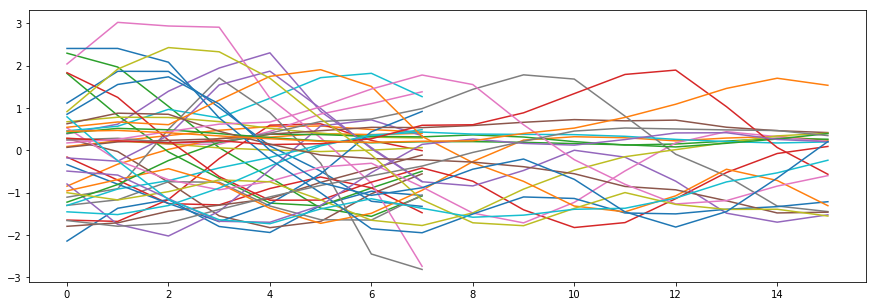

601/601 [==============================] - 0s 122us/step
Accuracies are equal to: LR=0.8469217970049917, RF=0.891846921797005, SVM=0.9550748752079867


In [5]:
plt.figure(figsize=(15,5))
for shap in clf.shapelets_:
    plt.plot(shap)
plt.show()

X_distances_train = clf.transform(X_train)
X_distances_test = clf.transform(X_test)

rf = GridSearchCV(RandomForestClassifier(), {'n_estimators': [10, 25, 50, 100, 500]})
rf.fit(X_distances_train, y_train)

learning_accuracy_rf = accuracy_score(y_test, rf.predict(X_distances_test))

svc = GridSearchCV(SVC(kernel='linear'), {'C': [0.001, 0.01, 0.1, 1.0, 10.0]})
svc.fit(X_distances_train, y_train)

learning_accuracy_svm = accuracy_score(y_test, svc.predict(X_distances_test))

lr = GridSearchCV(LogisticRegression(), {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1.0, 10.0]})
lr.fit(X_distances_train, y_train)

learning_accuracy_lr = accuracy_score(y_test, lr.predict(X_distances_test))

print('Accuracies are equal to: LR={}, RF={}, SVM={}'.format(learning_accuracy_lr, learning_accuracy_rf, learning_accuracy_svm))

In [ ]:
# loss: 0.1309 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0624
genetic_extractor = MultiGeneticExtractor(verbose=True, population_size=125, wait=10, plot=False, iterations=250)
shap_transformer = ShapeletTransformer(method=genetic_extractor)
shap_transformer.fit(X_train, y_train)

it		avg		std		max		time
1		-0.5579		0.046		-0.435412	6.7776
2		-0.5166		0.04		-0.435412	6.5084
3		-0.4873		0.038		-0.407858	5.5956
4		-0.4611		0.032		-0.407591	5.2523
5		-0.4378		0.027		-0.374037	6.0029
6		-0.4125		0.025		-0.349639	5.4871
7		-0.3966		0.022		-0.349185	8.601
8		-0.3787		0.019		-0.338857	9.3553
9		-0.3626		0.017		-0.336792	11.0659
10		-0.351		0.011		-0.335926	9.2055
11		-0.3443		0.006		-0.324647	9.5046
12		-0.34		0.007		-0.319485	8.0605
13		-0.3348		0.006		-0.319485	11.0574
14		-0.3312		0.006		-0.319485	13.7661
15		-0.3272		0.006		-0.317666	11.3999
16		-0.3236		0.005		-0.31611	12.4132
17		-0.3206		0.003		-0.31611	11.256
18		-0.3192		0.002		-0.314375	8.6855
19		-0.3181		0.002		-0.312901	10.3138
20		-0.3171		0.002		-0.312901	9.6075
21		-0.3151		0.003		-0.303916	7.9918
22		-0.3131		0.005		-0.302153	11.5179
23		-0.3115		0.005		-0.29683	9.1941
24		-0.3101		0.004		-0.29683	10.2431
25		-0.3079		0.004		-0.29683	10.355
26		-0.3061		0.004		-0.295542	11.3233
27		-0.3041		0.003		-0.2

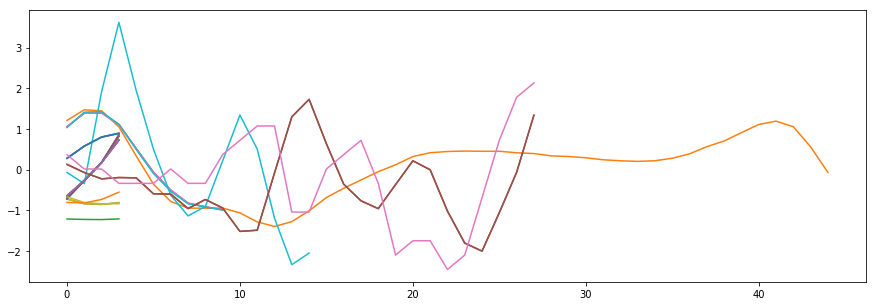

Accuracies are equal to: LR=0.8718801996672213, RF=0.8369384359400999, SVM=0.8735440931780366


In [12]:
plt.figure(figsize=(15,5))
for shap in shap_transformer.shapelets:
    plt.plot(shap)
plt.show()

X_distances_train = shap_transformer.transform(X_train)
X_distances_test = shap_transformer.transform(X_test)

rf = GridSearchCV(RandomForestClassifier(), {'n_estimators': [10, 25, 50, 100, 500]})
rf.fit(X_distances_train, y_train)

genetic_accuracy_rf = accuracy_score(y_test, rf.predict(X_distances_test))

svc = GridSearchCV(SVC(kernel='linear'), {'C': [0.001, 0.01, 0.1, 1.0, 10.0]})
svc.fit(X_distances_train, y_train)

genetic_accuracy_svm = accuracy_score(y_test, svc.predict(X_distances_test))

lr = GridSearchCV(LogisticRegression(), {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1.0, 10.0]})
lr.fit(X_distances_train, y_train)

genetic_accuracy_lr = accuracy_score(y_test, lr.predict(X_distances_test))
print('Accuracies are equal to: LR={}, RF={}, SVM={}'.format(genetic_accuracy_lr, genetic_accuracy_rf, genetic_accuracy_svm))

In [8]:
clf.transform(X_test[:5, :])[:, :5]

5/5 [==============================] - 2s 381ms/step


array([[0.51841927, 0.01503223, 0.83717275, 0.13013399, 0.18121219],
       [0.16523933, 0.03410299, 0.07091618, 0.02700758, 0.11736155],
       [0.16663408, 0.02362907, 0.04968214, 0.08295345, 0.08980441],
       [0.4252212 , 0.05800697, 0.47034693, 0.07129765, 0.4505962 ],
       [0.32482243, 0.13233414, 0.36413407, 0.09250617, 0.4609878 ]],
      dtype=float32)

15.953312807500028 7


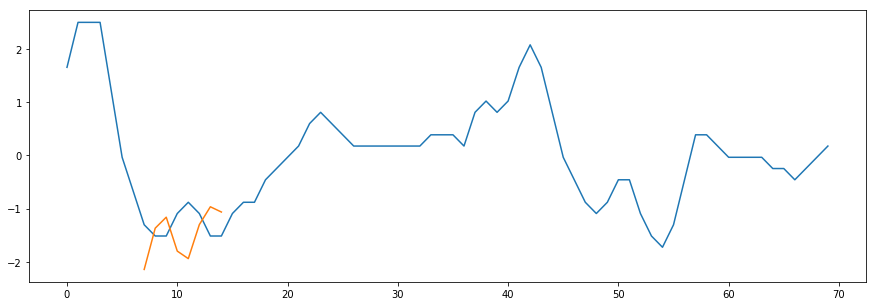

(63, 8)


0.16523937048162818

In [9]:
shapelet = clf.shapelets_[0]
sample = X_test[1, :]

def sdist_with_pos(x, y):
    if len(y) < len(x): return sdist(y, x)
    min_dist = np.inf
    best_pos = 0
    for j in range(len(y) - len(x) + 1):
        #norm_y = y[j:j+len(x)]
        dist = np.sum((x - y[j:j+len(x)])**2)
        if dist < min_dist:
            min_dist = dist
            best_pos = j
    return min_dist, best_pos

def local_square_dist(x, y):
    x_sq = np.reshape(np.sum(x ** 2, axis=1), (-1, 1))
    y_sq = np.reshape(np.sum(y ** 2), (1, 1))
    xy = np.dot(x, y)
    return (x_sq + y_sq - 2 * xy) / len(y)

d, pos = sdist_with_pos(shapelet, sample)
print(d, pos)

plt.figure(figsize=(15,5))
plt.plot(sample)
plt.plot(range(pos, pos+len(shapelet)), shapelet)
plt.show()

# TODO: simplify this so that we dont need this for-loop!!!

steps = []
for i in range(len(sample) - len(shapelet) + 1):
    steps.append(sample[i:i+len(shapelet)])
steps = np.array(steps)
print(steps.shape)

# The distance between these two should be 0.15254669
np.min(local_square_dist(steps, shapelet))

In [10]:
377 * 141

53157